#  **Importing Libraries & Dependencies**

In [ ]:


!pip install langdetect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib.gridspec as gridspec

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.svm import SVC

import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords

import re
from langdetect import detect
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import sklearn

from sklearn.model_selection import cross_val_score



from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score ,recall_score,precision_score,f1_score

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=a3a4c9f2b5108d5448613bc619ee286136472e9f13e9951549a83e333a79502b
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Display option for rows & columns
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 400)
pd.set_option('display.min_rows', 10)
pd.set_option('display.expand_frame_repr', True)

# **Reading Soruce Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading Files and storing in Dataframes
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hackathon/training_data.csv')

# **Data Quality Report**

In [ ]:
# View the first 5 rows
df.head()

job_id                            title                location department  \
0    7531   Contact Center Representatives  US, VA, Virginia Beach        NaN   
1     130      Customer Service Associate           US, TX, Dallas        NaN   
2    4641           Automated Test Analyst         NZ, , Auckland   Permanent   
3     403  Inside Sales Professional-Omaha           US, NE, Omaha        NaN   
4   13219    Content Marketing/SEO Manager     US, CA, Los Angeles  Marketing   

  salary_range                                    company_profile  \
0          NaN  Tidewater Finance Co. was established in 1992 ...   
1          NaN  Novitex Enterprise Solutions, formerly Pitney ...   
2          NaN  SilverStripe CMS &amp; Framework is an open so...   
3          NaN  ABC Supply Co., Inc. is the nation’s largest w...   
4          NaN  MeUndies is a lifestyle brand that is transfor...   

                                         description  \
0  Tidewater Finance Company, located in Virginia...   
1  The Customer Service Associate will be based i...   
2  We are looking for a dedicated and passionate ...   
3  As a Sales Representative, you will provide as...   
4  MeUndies is a lifestyle brand that is transfor...   

                                        requirements  \
0  The position requires the following qualificat...   
1  QualificationsMinimum of 1 year customer servi...   
2                                                NaN   
3  As a Sales Representative, you must have the a...   
4  REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...   

                                            benefits  telecommuting  \
0  Our company offers a competitive salary plus B...              0   
1                                                NaN              0   
2                                                NaN              0   
3  Your benefits package as a Sales Representativ...              0   
4  WHY MEUNDIES?We're a fast-growing, VC-backed c...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0       Full-time         Entry level   
1                 1              0       Full-time         Entry level   
2                 1              1       Full-time    Mid-Senior level   
3                 1              0       Full-time                 NaN   
4                 1              0       Full-time    Mid-Senior level   

          required_education                             industry  \
0                Unspecified                   Financial Services   
1  High School or equivalent                   Telecommunications   
2                        NaN  Information Technology and Services   
3                        NaN                   Building Materials   
4          Bachelor's Degree                             Internet   

           function  fraudulent  
0  Customer Service           0  
1  Customer Service           0  
2               NaN           0  
3             Sales           0  
4         Marketing           0

In [ ]:
# Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               14304 non-null  int64 
 1   title                14304 non-null  object
 2   location             14024 non-null  object
 3   department           5029 non-null   object
 4   salary_range         2283 non-null   object
 5   company_profile      11632 non-null  object
 6   description          14303 non-null  object
 7   requirements         12172 non-null  object
 8   benefits             8501 non-null   object
 9   telecommuting        14304 non-null  int64 
 10  has_company_logo     14304 non-null  int64 
 11  has_questions        14304 non-null  int64 
 12  employment_type      11547 non-null  object
 13  required_experience  8629 non-null   object
 14  required_education   7805 non-null   object
 15  industry             10378 non-null  object
 16  func

In [ ]:
# Check for missing values
df.isna().sum()

job_id                     0
title                      0
location                 280
department              9275
salary_range           12021
company_profile         2672
description                1
requirements            2132
benefits                5803
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         2757
required_experience     5675
required_education      6499
industry                3926
function                5169
fraudulent                 0
dtype: int64

In [ ]:
column=['description','requirements','employment_type' ,'required_experience' ,'required_education' ]

 It can be seen that there are both continuous and categorical features for
the dataset.


 <li><b>CONTINOUS Features</b> - 'job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'</li>

  <li><b>CATEGORICAL Features</b> - 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'</li>


Based on this, we can explore and assess the data quality of the features


# **Assessing Data Quality: Continuous Columns**

In [ ]:
COL_NAMES_CONTINUOUS = ['job_id','telecommuting', 'has_company_logo',
                        'has_questions','fraudulent']


print("-" * 45)

def describe_continuous_cols(df, col_name):
  """
  Prints the description for the continuous column
  """
  print()
  print('\033[1m')
  print(f"Description for '{col_name}' column: ")
  print('\033[0m')
  print()
  print(df[col_name].describe())
  print(f"Cardinality: {len(pd.unique(df[col_name]))}")
  print()
  print("-" * 45)

for col in COL_NAMES_CONTINUOUS:
  describe_continuous_cols(df, col)

---------------------------------------------


Description for 'job_id' column: 


count    14304.000000
mean      8929.775098
std       5175.090260
min          1.000000
25%       4438.750000
50%       8905.500000
75%      13430.250000
max      17880.000000
Name: job_id, dtype: float64
Cardinality: 14304

---------------------------------------------


Description for 'telecommuting' column: 


count    14304.000000
mean         0.041597
std          0.199673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: telecommuting, dtype: float64
Cardinality: 2

---------------------------------------------


Description for 'has_company_logo' column: 


count    14304.000000
mean         0.792995
std          0.405173
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: has_company_logo, dtype: float64
Cardinality: 2

---------------------------------------------



# **Assesing Data Quality: Categorical Columns**

In [ ]:
COL_NAMES_CATEGORICAL = ['title', 'location',
                         'department', 'salary_range',
                         'company_profile', 'description', 'requirements',
                         'benefits', 'employment_type','required_experience'
                         , 'required_education', 'industry', 'function']

print("-" * 45)

def describe_categorical_cols(df, col_name):
  """
  Prints the description for the continuous column
  """
  print()
  print('\033[1m')
  print(f"Description for '{col_name}' column: ")
  print('\033[0m')
  print()
  print(df[col_name].describe())
  print()
  print(df[col_name].value_counts())
  print()
  print("-" * 45)

for col in COL_NAMES_CATEGORICAL:
  describe_categorical_cols(df, col)

---------------------------------------------


Description for 'title' column: 


count                       14304
unique                       9288
top       English Teacher Abroad 
freq                          262
Name: title, dtype: object

title
English Teacher Abroad                                                262
Graduates: English Teacher Abroad (Conversational)                    120
Customer Service Associate                                            118
English Teacher Abroad                                                 70
English Teacher Abroad (Conversational)                                68
                                                                     ... 
SQL Server Developer                                                    1
Windows Desktop Application Developer                                   1
Bristol  DGV Apprenticeship available under NAS 18 year olds only!      1
Web-Designer (m/f)                                                      1
Java AT

# **Analysing the Data Quality and Proposing how to handle issues**

 Based on the Data Quality report, Below observations can be made about the categorical and continous features

<b>CONTINOUS Features</b>
  
  - <i><b>job_id</b></i> :
    - Identity column
    - Convert to index column

  - <i><b>telecommuting</b></i>
    - Actually a boolean column but it is numeric here
    - Convert it to boolean column

  - <i><b>has_company_logo</b></i>
    - Actually a boolean column but it is numeric here
    - Convert it to boolean column

  - <i><b>has_questions</b></i>
    - Actually a boolean column but it is numeric here
    - Convert it to boolean column

  - <i><b>fraudulent</b></i>
    - Actually a boolean column but it is numeric here
    - Convert it to boolean column

<b>CATEGORICAL Features</b>
  - <i><b>title</b></i>
    - Not a string column
    - Convert to string
  - <i><b>location</b></i>
    - Format is concatenated string -> Country, State, City
    - Split the column and create 3 new columns - Country, State, City
    - Handle missing values
    -  replace with 'Unspecified'

  - <i><b>department</b></i>
    - High percentage of missing values > 60%
    - Remove feature column

  - <i><b>salary_range</b></i>
    - High percentage of missing values > 60%
    - Remove feature column

  - <i><b>company_profile</b></i>
    -  &amp;, URLs, special characters values are present
    -  Remove all unwanted characters
    - Missing values -> 18.5%
    - Replace missing values with 'Unspecified'
    - Not a string column
    - Convert to string column


  - <i><b>description</b></i>
    -  &amp;, URLs, special characters values are present
    -  Remove all unwanted characters
    - Missing values -> 0.01%
    - Replace missing values with 'Unspecified'
    - Not a string column
    - Convert to string column

  - <i><b>requirements</b></i>
    -  &amp;, URLs, special characters values are present
    -  Remove all unwanted characters
    - Missing values -> 15%
    - Replace missing values with 'Unspecified'
    - Not a string column
    - Convert to string column

  - <i><b>benefits</b></i>
    -"See job description" - implies "description" value- can be replaced
    - If "See job description" is replaced to be same as description, then during concatenation of strings, there will be a duplicate
    
    So - how to handle this? Replace with empty? Replace with some other values? What are the implications of this?

    - If missing values are there so that description needed to be considered, then the problem remains the same
    - Missing values -> 40% -> may be it implies description is enough?
    -Not a string column
    - Convert to string column
    -benefits and description columns are interchangeably used for some instances
    - Check and update for missing values if required

  - <i><b>employment_type</b></i>
    - Missing values
    - Since cardinality is low, check for values in requirements and       description column to see if something matches
     full time, part time, temporary  (contract-not making sense)
      Example - 'full time' is matching in requirement

    - For further missing values, can be replaced with 'other'

    - Internship can be searched based on description values and a new field called Internship can be added or Temporary can be used
    
    -Not a string column
    - Convert to string column


  - <i><b>required_experience</b></i>
    - missing values
    - If blank and 'no minimum experience" -> change to 'Not applicable

    - If blank and 'entry level' is there, then change to  Entry level

    - If blank and 'experience' is there, then change to 'Mid-senior level' or Entry level

    -Not a string column
    - Convert to string column


  - <i><b>required_education</b></i>
    - Missing values
    - Look for values like 'high school', 'diploma, certification, degree, bachelors, masters in that order and keep replacing with proper values
    -Not a string column
    - Convert to string column

  - <i><b>industry</b></i>
    - Missing Values
    - Replace with 'Unspecified'
    -Not a string column
    - Convert to string column

  - <i><b>function</b></i>
    - Missing Values
    - Replace with 'Other'
    -Not a string column
    - Convert to string column
  

# **Data Cleaning**

In [ ]:
# Dropping Duplicate Rows
df = df.drop_duplicates(keep="last")

In [ ]:
# Determining the Null Value Data
round((df.isna().sum()/len(df) ) * 100).sort_values(ascending=False)

salary_range           84.0
department             65.0
required_education     45.0
benefits               41.0
required_experience    40.0
function               36.0
industry               27.0
company_profile        19.0
employment_type        19.0
requirements           15.0
location                2.0
job_id                  0.0
title                   0.0
description             0.0
telecommuting           0.0
has_questions           0.0
has_company_logo        0.0
fraudulent              0.0
dtype: float64

# **Data Cleaning**

## **Job_Id**

In [ ]:
# Converting to index column
df = df.set_index('job_id')
df.head(5)

title                location department  \
job_id                                                                       
7531     Contact Center Representatives  US, VA, Virginia Beach        NaN   
130         Customer Service Associate           US, TX, Dallas        NaN   
4641             Automated Test Analyst         NZ, , Auckland   Permanent   
403     Inside Sales Professional-Omaha           US, NE, Omaha        NaN   
13219     Content Marketing/SEO Manager     US, CA, Los Angeles  Marketing   

       salary_range                                    company_profile  \
job_id                                                                   
7531            NaN  Tidewater Finance Co. was established in 1992 ...   
130             NaN  Novitex Enterprise Solutions, formerly Pitney ...   
4641            NaN  SilverStripe CMS &amp; Framework is an open so...   
403             NaN  ABC Supply Co., Inc. is the nation’s largest w...   
13219           NaN  MeUndies is a lifestyle brand that is transfor...   

                                              description  \
job_id                                                      
7531    Tidewater Finance Company, located in Virginia...   
130     The Customer Service Associate will be based i...   
4641    We are looking for a dedicated and passionate ...   
403     As a Sales Representative, you will provide as...   
13219   MeUndies is a lifestyle brand that is transfor...   

                                             requirements  \
job_id                                                      
7531    The position requires the following qualificat...   
130     QualificationsMinimum of 1 year customer servi...   
4641                                                  NaN   
403     As a Sales Representative, you must have the a...   
13219   REQUIREMENTS/QUALIFICATIONS/PERSONAL ATTRIBUTE...   

                                                 benefits  telecommuting  \
job_id                                                                     
7531    Our company offers a competitive salary plus B...              0   
130                                                   NaN              0   
4641                                                  NaN              0   
403     Your benefits package as a Sales Representativ...              0   
13219   WHY MEUNDIES?We're a fast-growing, VC-backed c...              0   

        has_company_logo  has_questions employment_type required_experience  \
job_id                                                                        
7531                   1              0       Full-time         Entry level   
130                    1              0       Full-time         Entry level   
4641                   1              1       Full-time    Mid-Senior level   
403                    1              0       Full-time                 NaN   
13219                  1              0       Full-time    Mid-Senior level   

               required_education                             industry  \
job_id                                                                   
7531                  Unspecified                   Financial Services   
130     High School or equivalent                   Telecommunications   
4641                          NaN  Information Technology and Services   
403                           NaN                   Building Materials   
13219           Bachelor's Degree                             Internet   

                function  fraudulent  
job_id                                
7531    Customer Service           0  
130     Customer Service           0  
4641                 NaN           0  
403                Sales           0  
13219          Marketing           0

## **Telecommuting, Company Logo, Questions, Fradulent**

In [ ]:
# Converting the below numerical columns to bool type
# Describing the Stats of telecommuting,has_company_logo,has_questions,fraudulent Columns
df.describe()

telecommuting  has_company_logo  has_questions    fraudulent
count   14304.000000      14304.000000   14304.000000  14304.000000
mean        0.041597          0.792995       0.492939      0.048448
std         0.199673          0.405173       0.499968      0.214718
min         0.000000          0.000000       0.000000      0.000000
25%         0.000000          1.000000       0.000000      0.000000
50%         0.000000          1.000000       0.000000      0.000000
75%         0.000000          1.000000       1.000000      0.000000
max         1.000000          1.000000       1.000000      1.000000

In [ ]:
# Converting the below Numerical Columns to bool type
df['telecommuting'] = df['telecommuting'].astype('bool')
df['has_company_logo'] = df['has_company_logo'].astype('bool')
df['has_questions'] = df['has_questions'].astype('bool')
df['fraudulent'] = df['fraudulent'].astype('bool')

In [ ]:
df.describe()

title         location department salary_range  \
count                     14304            14024       5029         2283   
unique                     9288             2751       1163          771   
top     English Teacher Abroad   GB, LND, London      Sales          0-0   
freq                        262              579        433          115   

                                          company_profile  \
count                                               11632   
unique                                               1596   
top     We help teachers get safe &amp; secure jobs ab...   
freq                                                  599   

                                              description  \
count                                               14303   
unique                                              12027   
top     Play with kids, get paid for it Love travel? J...   
freq                                                  308   

                                             requirements  \
count                                               12172   
unique                                               9766   
top     University degree required. TEFL / TESOL / CEL...   
freq                                                  336   

                   benefits telecommuting has_company_logo has_questions  \
count                  8501         14304            14304         14304   
unique                 5136             2                2             2   
top     See job description         False             True         False   
freq                    599         13709            11343          7253   

       employment_type required_experience required_education  \
count            11547                8629               7805   
unique               5                   7                 13   
top          Full-time    Mid-Senior level  Bachelor's Degree   
freq              9306                3011               4116   

                                   industry                function fraudulent  
count                                 10378                    9135      14304  
unique                                  129                      37          2  
top     Information Technology and Services  Information Technology      False  
freq                                   1395                    1396      13611

# **Data Cleaning - Categorical Columns**

## **Title**

In [ ]:
# Converting to String since it was not a string column

df["title"] = df["title"].astype("str")

## **Location**

In [ ]:
# Splitting the Location column and creating 3 new columns - Country, State, City

df['Country'] = df['location'].str.split(',').str[0]
df['State'] = df['location'].str.split(',').str[1]
df['City'] = df['location'].str.split(',').str[2]
df[['location','Country','State','City']]


location Country State             City
job_id                                                       
7531    US, VA, Virginia Beach      US    VA   Virginia Beach
130             US, TX, Dallas      US    TX           Dallas
4641           NZ, , Auckland       NZ              Auckland 
403              US, NE, Omaha      US    NE            Omaha
13219      US, CA, Los Angeles      US    CA      Los Angeles
...                        ...     ...   ...              ...
1842            US, CA, Irvine      US    CA           Irvine
11853            GR, I, Athens      GR     I           Athens
10871     US, NJ, Elmwood Park      US    NJ     Elmwood Park
566            US, AZ, Phoenix      US    AZ          Phoenix
13399          CA, ON, Toronto      CA    ON          Toronto

[14304 rows x 4 columns]

In [ ]:
# Checking for any missing values
col_1 = ['location','Country','State','City']
round((df[col_1].isna().sum()/len(df) ) * 100).sort_values(ascending=False)

location    2.0
Country     2.0
State       2.0
City        2.0
dtype: float64

In [ ]:
# Missing or Empty values - replacing with 'Unspecified'

df.replace(r'^\s*$', np.nan, regex=True, inplace= True)

col_1 = ['location','Country','State','City']
df[col_1] = df[col_1].fillna('Unspecified')

round((df[col_1].isna().sum()/len(df)) * 100).sort_values(ascending=False)

location    0.0
Country     0.0
State       0.0
City        0.0
dtype: float64

In [ ]:
df['Country'].value_counts()

Country
US             8520
GB             1895
GR              754
CA              377
DE              305
Unspecified     280
NZ              269
IN              219
AU              171
NL              108
PH              105
BE               90
IE               89
SG               64
PL               64
HK               60
IL               57
FR               55
EE               54
ES               52
AE               47
EG               45
SE               38
DK               36
RO               36
ZA               35
BR               28
IT               27
FI               23
PK               21
LT               20
MY               19
QA               18
JP               17
TR               17
BG               15
RU               14
PT               12
CN               12
SA               11
MU               11
AT               11
CY               11
UA               11
CH               11
MX               11
ID               10
NG               10
BH                8
BY                8
HU                8
KR                7
LU                7
NO                7
TH                7
PA                7
AR                6
MT                6
IQ                6
RS                5
KE                5
CZ                5
TT                4
VN                4
LV                4
TW                3
AM                2
SK                2
IS                2
VI                2
BD                2
TN                2
NI                2
KW                2
LK                2
CL                1
ZM                1
HR                1
UG                1
SI                1
SV                1
AL                1
GH                1
KH                1
JM                1
MA                1
KZ                1
SD                1
PE                1
Name: count, dtype: int64

## **Department and Salary Range**

In [ ]:
# Checking for any missing values
round((df[['department', 'salary_range']].isna().sum()/len(df) ) * 100).sort_values(ascending=False)

salary_range    84.0
department      65.0
dtype: float64

In [ ]:
# Removing the Feature Column since it has High percentage of missing values > 60%
df.drop(['department', 'salary_range'], axis=1, inplace=True)

## **Company Profile, Description, Benefits and Requirements**

In [ ]:
# Checking for any missing values
col_2 = ['company_profile','description','requirements','benefits']
round(( df[col_2].isnull().sum()/len(df) ) * 100).sort_values(ascending=False)

benefits           41.0
company_profile    19.0
requirements       15.0
description         0.0
dtype: float64

In [ ]:
#Replacing missing values with 'Unspecified'

df[col_2] = df[col_2].fillna('Unspecified')
round((df[col_2].isna().sum()/len(df)) * 100).sort_values(ascending=False)

company_profile    0.0
description        0.0
requirements       0.0
benefits           0.0
dtype: float64

In [ ]:
# Converting the below columns to String

df['description'] = df['description'].astype("str")
df['requirements'] = df['requirements'].astype("str")
df['company_profile'] = df['company_profile'].astype("str")
df['benefits'] = df['benefits'].astype("str")


## **Employment Type, Required Experience, Required Education**

In [ ]:
# Checking for any missing values for the columns

print("Missing values for Employment Type")
print(round((df['employment_type'].isnull().sum()/len(df) ) * 100))
print()

print("Missing values for Required Experience")
print(round((df['required_experience'].isnull().sum()/len(df) ) * 100))
print()

print("Missing values for Required Education")
print(round((df['required_education'].isnull().sum()/len(df) ) * 100))
print()

Missing values for Employment Type
19

Missing values for Required Experience
40

Missing values for Required Education
45



In [ ]:
print('\033[1m' + '\u0332'.join("VALUE COUNTS - Before removing NaN values") + '\033[0m')
print()
print('\033[1m' + "Employment Type- Value counts" + '\n' + '\033[0m')
print(df["employment_type"].value_counts())
print()
print( '\033[1m' + "Required Experience- Value counts" + '\n' + '\033[0m')
print(df["required_experience"].value_counts())
print()
print('\033[1m' + "Required Education- Value counts" + '\n' + '\033[0m')
print(df["required_education"].value_counts())

V̲A̲L̲U̲E̲ ̲C̲O̲U̲N̲T̲S̲ ̲-̲ ̲B̲e̲f̲o̲r̲e̲ ̲r̲e̲m̲o̲v̲i̲n̲g̲ ̲N̲a̲N̲ ̲v̲a̲l̲u̲e̲s

Employment Type- Value counts

employment_type
Full-time    9306
Contract     1224
Part-time     626
Temporary     200
Other         191
Name: count, dtype: int64

Required Experience- Value counts

required_experience
Mid-Senior level    3011
Entry level         2177
Associate           1832
Not Applicable       884
Director             314
Internship           301
Executive            110
Name: count, dtype: int64

Required Education- Value counts

required_education
Bachelor's Degree                    4116
High School or equivalent            1650
Unspecified                          1095
Master's Degree                       339
Associate Degree                      227
Certification                         148
Some College Coursework Completed      78
Professional                           57
Vocational                             38
Some High School Coursework            24
Doctorate              

In [ ]:
# Fill NULL or NaN values with '' for the columns

df['employment_type'] = df['employment_type'].fillna('')

df['required_experience'] = df['required_experience'].fillna('')

df['required_education'] = df['required_education'].fillna('')


In [ ]:
# Checking for any missing values for the columns

print('\033[1m' + '\u0332'.join("MISSING VALUES AFTER NaN values are handled") + '\033[0m')
print()
print('\033[1m' + "Missing values for Employment Type" + '\033[0m')
print(round(( df['employment_type'].isnull().sum()/len(df) ) * 100))
print()

print('\033[1m' + "Missing values for Required Experience" + '\033[0m')
print(round(( df['required_experience'].isnull().sum()/len(df) ) * 100))
print()

print('\033[1m' + "Missing values for Required Education" + '\033[0m')
print(round((df['required_education'].isnull().sum()/len(df) ) * 100))
print()

M̲I̲S̲S̲I̲N̲G̲ ̲V̲A̲L̲U̲E̲S̲ ̲A̲F̲T̲E̲R̲ ̲N̲a̲N̲ ̲v̲a̲l̲u̲e̲s̲ ̲a̲r̲e̲ ̲h̲a̲n̲d̲l̲e̲d

Missing values for Employment Type
0

Missing values for Required Experience
0

Missing values for Required Education
0



In [ ]:
print('\033[1m' + '\u0332'.join("VALUE COUNTS - After removing NaN values") + '\033[0m')
print()
print('\033[1m' + "Employment Type- Value counts" + '\n' + '\033[0m')
print(df["employment_type"].value_counts())
print()
print('\033[1m' + "Required Experience- Value counts" + '\n' + '\033[0m')
print(df["required_experience"].value_counts())
print()
print('\033[1m' + "Required Education- Value counts" + '\n' + '\033[0m' )
print(df["required_education"].value_counts())

V̲A̲L̲U̲E̲ ̲C̲O̲U̲N̲T̲S̲ ̲-̲ ̲A̲f̲t̲e̲r̲ ̲r̲e̲m̲o̲v̲i̲n̲g̲ ̲N̲a̲N̲ ̲v̲a̲l̲u̲e̲s

Employment Type- Value counts

employment_type
Full-time    9306
             2757
Contract     1224
Part-time     626
Temporary     200
Other         191
Name: count, dtype: int64

Required Experience- Value counts

required_experience
                    5675
Mid-Senior level    3011
Entry level         2177
Associate           1832
Not Applicable       884
Director             314
Internship           301
Executive            110
Name: count, dtype: int64

Required Education- Value counts

required_education
                                     6499
Bachelor's Degree                    4116
High School or equivalent            1650
Unspecified                          1095
Master's Degree                       339
Associate Degree                      227
Certification                         148
Some College Coursework Completed      78
Professional                           57
Vocational              

In [ ]:
# Converting the below columns to String Values

df['employment_type'] = df['employment_type'].astype(str)
df['required_experience'] = df['required_experience'].fillna('')
df['required_education'] = df['required_education'].fillna('')


In [ ]:
# Function to Transform all the empty rows to a desired values

def transform_row(single_row):

  concat_req_des = single_row["requirements"] + " " + single_row["description"]
  emp_type = single_row["employment_type"].strip()
  req_exp = single_row["required_experience"].strip()
  req_edu = single_row["required_education"].strip()

  # If employment type is missing or is empty
  if len(emp_type) == 0:
    if (re.search(r'[fF]ull.[tT]ime',concat_req_des)):
      single_row["employment_type"] = "Full-time"
    elif (re.search(r'[pP]art.[tT]ime',concat_req_des )):
      single_row["employment_type"] = "Part-time"
    elif (re.search(r'[cC]ontract', concat_req_des)):
      single_row["employment_type"] = "Contract"
    elif (re.search(r'[tT]emporary', concat_req_des)):
      single_row["employment_type"] = "Temporary"
    elif (re.search(r'[iI]nternship',concat_req_des)):
      single_row["employment_type"] = "Internship"
    else:
      single_row["employment_type"] = "Unspecified"


  # if Required experience is empty

  if len(req_exp) == 0:
    if (re.search(r'[nN]o.[mM]inimum.[eE]xperience',concat_req_des)):
      single_row['required_experience'] = 'Not Applicable'
    elif (re.search(r'[eE]ntry.[lL]evel',concat_req_des)):
      single_row['required_experience'] = 'Entry level'
    elif (re.search(r'[eE]xperienced',concat_req_des)):
      single_row['required_experience'] = 'Mid-Senior level'
    elif (re.search(r'[dD]irector',concat_req_des)):
      single_row['required_experience'] = 'Director'
    elif (re.search(r'[iI]nternship',concat_req_des)):
      single_row['required_experience'] = 'Internship'
    elif (re.search(r'[eE]xecutive',concat_req_des)):
      single_row['required_experience'] = 'Executive'
    elif (re.search(r'[aA]ssociate',concat_req_des)):
      single_row['required_experience'] = 'Associate'
    elif (re.search(r'[Mm]id.[Ss]enior.[lL]evel',concat_req_des)):
      single_row['required_experience'] = 'Mid-Senior level'
    else:
      single_row["required_experience"] = "Unspecified"

    # If Required Education is missing/empty

  if len(req_edu) == 0:
    if (re.search(r'[hH]igh*school',concat_req_des)):
      single_row['required_education'] = 'High School or equivalent'
    elif (re.search(r'[hH][sS].[dD]iploma',concat_req_des)):
      single_row['required_education'] = 'Vocational - HS Diploma'
    elif (re.search(r'[cC]ertification',concat_req_des)):
      single_row['required_education'] = 'Certification'
    elif (re.search(r'[bB]achelor',concat_req_des)):
      single_row['required_education'] = 'Bachelor\'s Degree'
    elif (re.search(r'[mM]aster',concat_req_des)):
      single_row['required_education'] = 'Master\'s Degree'
    elif (re.search(r'[dD]egree',concat_req_des)):
      single_row['required_education'] = 'Associate Degree'
    elif (re.search(r'[Vv]ocational',concat_req_des)):
      single_row['required_education'] = 'Vocational'
    elif (re.search(r'[Pp]rofessional',concat_req_des)):
      single_row['required_education'] = 'Professional'
    elif (re.search(r'[Cc]oursework',concat_req_des)):
      single_row['required_education'] = 'Some College Coursework Completed'
    elif (re.search(r'[Dd]iploma',concat_req_des)):
      single_row['required_education'] = 'Diploma'
    else:
      single_row["required_education"] = "Unspecified"

  return single_row

# Transform all rows for employment type, required experience, required education
Fraud_Job_df = df.apply(transform_row,axis=1)


In [ ]:
print('\033[1m' + '\u0332'.join("VALUE COUNTS - After Preprocessing") + '\033[0m')
print()
print('\033[1m' + "Employment Type- Value counts" + '\n' + '\033[0m')
print(df["employment_type"].value_counts())
print()
print('\033[1m' + "Required Experience- Value counts" + '\n' + '\033[0m')
print(df["required_experience"].value_counts())
print()
print('\033[1m' + "Required Education- Value counts" + '\n' + '\033[0m')
print(df["required_education"].value_counts())

V̲A̲L̲U̲E̲ ̲C̲O̲U̲N̲T̲S̲ ̲-̲ ̲A̲f̲t̲e̲r̲ ̲P̲r̲e̲p̲r̲o̲c̲e̲s̲s̲i̲n̲g

Employment Type- Value counts

employment_type
Full-time    9306
             2757
Contract     1224
Part-time     626
Temporary     200
Other         191
Name: count, dtype: int64

Required Experience- Value counts

required_experience
                    5675
Mid-Senior level    3011
Entry level         2177
Associate           1832
Not Applicable       884
Director             314
Internship           301
Executive            110
Name: count, dtype: int64

Required Education- Value counts

required_education
                                     6499
Bachelor's Degree                    4116
High School or equivalent            1650
Unspecified                          1095
Master's Degree                       339
Associate Degree                      227
Certification                         148
Some College Coursework Completed      78
Professional                           57
Vocational                          

## **Industry and Function**

In [ ]:
# Checking for any missing values
col_3 = ['industry','function']
round((df[col_3].isnull().sum()/len(df) ) * 100).sort_values(ascending=False)

function    36.0
industry    27.0
dtype: float64

In [ ]:
# Replacing missing values with 'Unspecified' for Industry

df['industry'] = df['industry'].fillna('Unspecified')

# Replacing missing values with 'Other' for Function

df['function'] = df['function'].fillna('Other')

# Re-Checking the Null Values
round(( df[col_3].isna().sum()/len(df) ) * 100).sort_values(ascending=False)

industry    0.0
function    0.0
dtype: float64

In [ ]:
column=['']
print(df.iloc[[1409], [5,6,11,12,13]])

           benefits  telecommuting required_education           industry  \
job_id                                                                     
5931    Unspecified          False                     Apparel & Fashion   

       function  
job_id           
5931      Other  


## **Textual Preprocessing : Title,Company Profile , Description, Benefits & Requirements**

In [ ]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# function to remove non-ASCII
def remove_non_ascii(text):
    ret = []
    for i in text:
        if ord(i) < 128:
            ret.append(i)
        else:
            ret.append("")
    return ''.join(ret)


def tokenise_text(txt):

  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(txt)
  filtered_words = [w for w in tokens if len(w) > 2 and w not in STOP_WORDS]
  non_ascii_removed = [remove_non_ascii(w) for w in filtered_words]
  #stem_words=[stemmer.stem(w) for w in non_ascii_removed]
  #lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]

  return " ".join(non_ascii_removed)

def preprocess_column(df,col_name):

  df[col_name] = df[col_name].apply(lambda x: x.replace("nan",""))
  df[col_name] = df[col_name].apply(lambda x: x.strip().lower())
  df[col_name] = df[col_name].apply(lambda x: x.replace('{html}',""))

  reg_obj = re.compile('&[a-zA-Z0-9]*;|[0-9]+|http\S+|<.*?>')

  df[col_name] = df[col_name].apply(lambda x: re.sub(reg_obj, '', x))

  df[col_name] = df[col_name].apply(tokenise_text)

  return df[col_name]



In [ ]:

COL_LIST_TXT_PREPROCESSING=['title', 'location',
       'company_profile', 'description', 'requirements', 'benefits',
       'employment_type',
       'required_experience', 'required_education', 'industry', 'function']

for col in COL_LIST_TXT_PREPROCESSING:
  print(f"BEGIN: Textual Preprocessing for '{col}' column")
  preprocess_column(df, col)
  print(f"END: Textual Preprocessing for '{col}' column")
  print()

BEGIN: Textual Preprocessing for 'title' column
END: Textual Preprocessing for 'title' column

BEGIN: Textual Preprocessing for 'location' column
END: Textual Preprocessing for 'location' column

BEGIN: Textual Preprocessing for 'company_profile' column
END: Textual Preprocessing for 'company_profile' column

BEGIN: Textual Preprocessing for 'description' column
END: Textual Preprocessing for 'description' column

BEGIN: Textual Preprocessing for 'requirements' column
END: Textual Preprocessing for 'requirements' column

BEGIN: Textual Preprocessing for 'benefits' column
END: Textual Preprocessing for 'benefits' column

BEGIN: Textual Preprocessing for 'employment_type' column
END: Textual Preprocessing for 'employment_type' column

BEGIN: Textual Preprocessing for 'required_experience' column
END: Textual Preprocessing for 'required_experience' column

BEGIN: Textual Preprocessing for 'required_education' column
END: Textual Preprocessing for 'required_education' column

BEGIN: Textua

In [ ]:
# Data after cleaning
df.head(20)

title        location  \
job_id                                                                     
7531                      contact center representatives  virginia beach   
130                           customer service associate          dallas   
4641                              automated test analyst        auckland   
403                      inside sales professional omaha           omaha   
13219                      content marketing seo manager     los angeles   
4601                      sales account executive travel        new york   
16462                                    general manager       hong kong   
16916                        client service professional      cincinnati   
14309                               social media manager         yerevan   
5383                                  software developer          boston   
11039   technical services representative print services       san ramon   
10230           contract remote medical billing position    murfreesboro   
7856                                       end developer          athens   
14314                                    sales executive           plano   
14395                        operation support developer  ric twickenham   
17398                            direct sales consultant        auckland   
3493                                admissions counselor    denver metro   
77                                         medical coder      fort worth   
8522                         bookkeeper staff accountant     los angeles   
16688                                  android developer         kolkata   

                                          company_profile  \
job_id                                                      
7531    tidewater fice established initial purpose pur...   
130     novitex enterprise solutions pitney bowes mana...   
4641    silverstripe cms framework open source platfor...   
403     abc supply inc nation largest wholesale distri...   
13219   meundies lifestyle brand transforming way peop...   
4601                                          unspecified   
16462   hayes corp create fun stuff focus software dev...   
16916   lei home enhancements ohio based company insta...   
14309                                         unspecified   
5383                                          unspecified   
11039   novitex enterprise solutions pitney bowes mana...   
10230   divine medical billing core business provide m...   
7856    nubis edge cloud app development company creat...   
14314   visual leading fastest growing firms focusing ...   
14395   exceptional record growth years largest online...   
17398   callcentre people recruitment recognised speci...   
3493    electus believes long term relationships candi...   
77      spotsource solutions llc global human capital ...   
8522    gpl technologies solutions provider focused de...   
16688   techindyeah fun filled startup celebrate work ...   

                                              description  \
job_id                                                      
7531    tidewater fice company located virginia beach ...   
130     customer service associate based dallas right ...   
4641    looking dedicated passionate software test ana...   
403     sales representative provide assistance custom...   
13219   meundies lifestyle brand transforming way peop...   
4601    open office little red tape travel start envir...   
16462   hayes corp seeking general manager manage insp...   
16916   clients interested home owners like purchase h...   
14309   implement social media strategy best practices...   
5383    thomson reuters life sciences looking hire sof...   
11039   customer service technical specialist based sa...   
10230   medical billing service middle looking motivat...   
7856    design develop innovative bootstrap responsive...   
14314   city location hub city usa join fastest growin...   
14395   worldstoreswith exceptional record growth year...  

In [ ]:
# Checking the preprocessed text
df[COL_LIST_TXT_PREPROCESSING]

title        location  \
job_id                                                    
7531     contact center representatives  virginia beach   
130          customer service associate          dallas   
4641             automated test analyst        auckland   
403     inside sales professional omaha           omaha   
13219     content marketing seo manager     los angeles   
...                                 ...             ...   
1842           public relations manager          irvine   
11853                     ios developer          athens   
10871               database researcher    elmwood park   
566          customer service associate         phoenix   
13399        super marketing specialist         toronto   

                                          company_profile  \
job_id                                                      
7531    tidewater fice established initial purpose pur...   
130     novitex enterprise solutions pitney bowes mana...   
4641    silverstripe cms framework open source platfor...   
403     abc supply inc nation largest wholesale distri...   
13219   meundies lifestyle brand transforming way peop...   
...                                                   ...   
1842    happyfox young startup bringing happiness quot...   
11853   tizu free iphone app allows send hidden messag...   
10871   investment professionals located united states...   
566     novitex enterprise solutions pitney bowes mana...   
13399                                         unspecified   

                                              description  \
job_id                                                      
7531    tidewater fice company located virginia beach ...   
130     customer service associate based dallas right ...   
4641    looking dedicated passionate software test ana...   
403     sales representative provide assistance custom...   
13219   meundies lifestyle brand transforming way peop...   
...                                                   ...   
1842    happyfox young web saas startup bringing happi...   
11853   tizu mobile app allows send hidden messages fr...   
10871   real estate investment broker seeking time dat...   
566     customer service associate based phoenix right...   
13399   want grow dad asked marine biologist astronaut...   

                                             requirements  \
job_id                                                      
7531    position requires following qualifications min...   
130     qualificationsminimum year customer service re...   
4641                                          unspecified   
403     sales representative ability provide superior ...   
13219   requirements qualifications personal attribute...   
...                                                   ...   
1842    years experience relevant proven track record ...   
11853   years ios developmenthave published original i...   
10871   required skills excel microsoft office comfort...   
566     minimum requirements minimum months customer s...   
13399   killer marketing instinct know sell understand...   

                                                 benefits employment_type  \
job_id                                                                      
7531    company offers competitive salary plus bonuses...            time   
130                                           unspecified            time   
4641                                          unspecified            time   
403     benefits package sales representative include ...            time   
13219   meundies fast growing backed company laser foc...            time   
...                                                   ...             ...   
1842      competitive paycasual creative work environment        contract   
11853   funded offer salary established connections vc...                   
10871                                         unspecified            time   
566                                  

# **Exploratory Data Visualization**

In [ ]:
# combine text in a single column to start cleaning our data
df['Concat_Strings']=df['title'] + ' '+df['location']+' '+ \
                     df['company_profile']+' '+ \
                     df['description']+' '+df['requirements']+ \
                     ' '+df['benefits']


#Fraud_Job_df['Concat_Strings'] = Fraud_Job_df['title']+' '+ Fraud_Job_df['description']


# Convert column to string
df['Concat_Strings'] = df['Concat_Strings'].astype('str')


## **Word Cloud for Fraudulent Jobs**

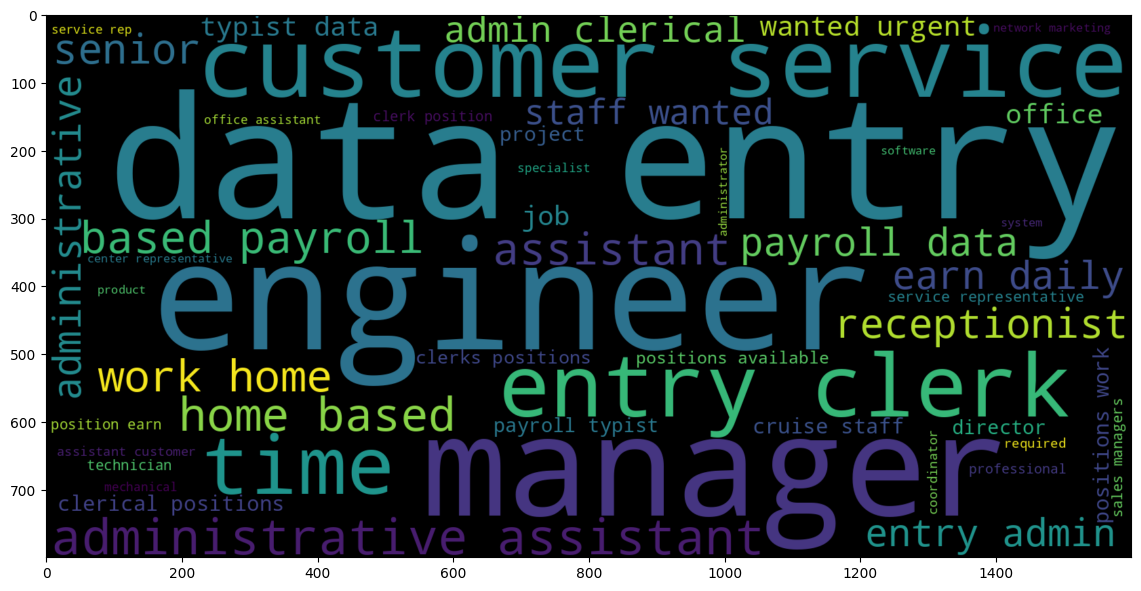

In [ ]:
df['req_desc']=df['description']+' '+df['requirements']

# Separate fraud and actual jobs
fraudjobs_text = df[Fraud_Job_df.fraudulent==1]["title"]
actualjobs_text = df[Fraud_Job_df.fraudulent==0]["title"]


# Fraudulent jobs word cloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (14,12))
fraudjobs_word_cloud = WordCloud(min_font_size = 3,  max_words = 50 , width = 1600 , \
               height = 800 ).generate(str(" ".join(fraudjobs_text)))
plt.rcParams["axes.grid"] = False

plt.imshow(fraudjobs_word_cloud,interpolation = 'bilinear')


## **Word Cloud for Non-Fraudulent Jobs**

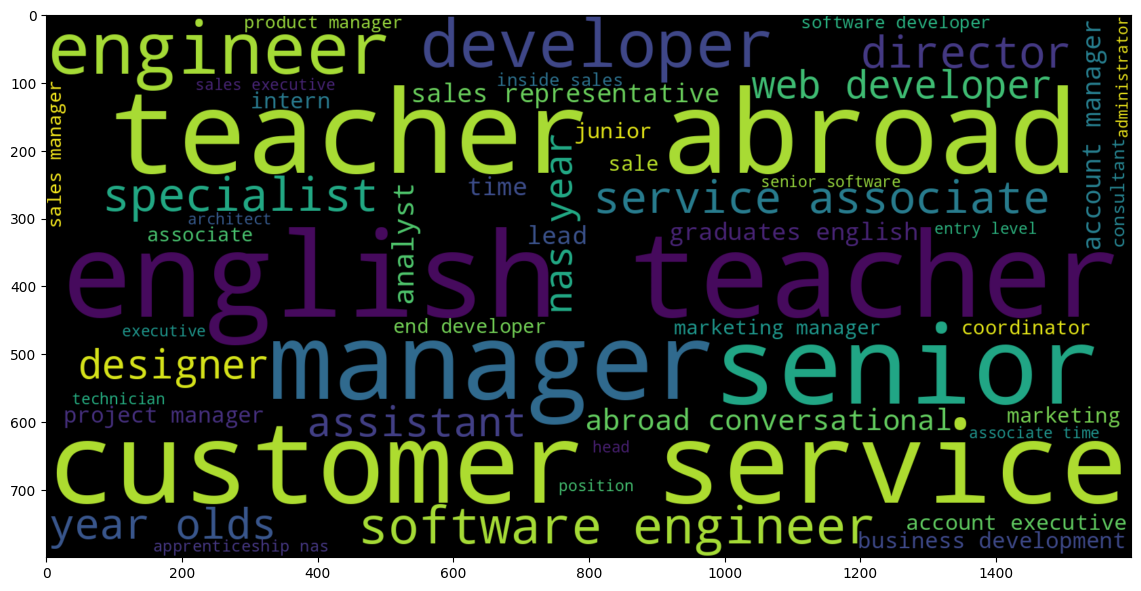

In [ ]:
# Plot Word Cloud for actual jobs
plt.figure(figsize = (14,12))
actualjobs_word_cloud = WordCloud(min_font_size = 3,  max_words = 50 , width = 1600 \
                , height = 800 \
                , stopwords = STOPWORDS).generate(" ".join(actualjobs_text))
plt.rcParams["axes.grid"] = False
plt.imshow(actualjobs_word_cloud,interpolation = 'bilinear')

In [ ]:
# combine text in a single column to start cleaning our data

df['Concat_Strings'] =  df['title'] + " " + df['description']

# Convert column to string
df['Concat_Strings'] = df['Concat_Strings'].astype('str')

## **Target Feature**

In [ ]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
False    13611
True       693
Name: fraudulent, dtype: int64

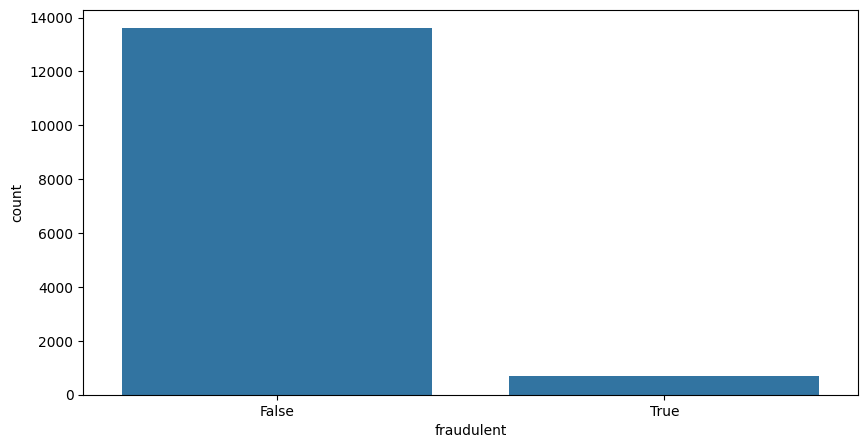

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='fraudulent',data=df)
plt.show()

From the above graph, we can infer that   

<b><i>
              
*   The data is very imbalanced between the actual and fake jobs.
*   Fraudulent job promotion postings are prevasive but are overshadowed by the real ads.
             
</i></b>

In [ ]:
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14304 entries, 7531 to 13399
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                14304 non-null  object
 1   location             14304 non-null  object
 2   company_profile      14304 non-null  object
 3   description          14304 non-null  object
 4   requirements         14304 non-null  object
 5   benefits             14304 non-null  object
 6   telecommuting        14304 non-null  bool  
 7   has_company_logo     14304 non-null  bool  
 8   has_questions        14304 non-null  bool  
 9   employment_type      14304 non-null  object
 10  required_experience  14304 non-null  object
 11  required_education   14304 non-null  object
 12  industry             14304 non-null  object
 13  function             14304 non-null  object
 14  fraudulent           14304 non-null  bool  
 15  Country              14304 non-null  object
 16  State 

In [ ]:
# Function for column distribution based on Target Variable
def distribution_vis(col) :

    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 5), dpi=100)
    real = df[df["fraudulent"]==False][col]

    sns.countplot(y=real, ax=ax1, order=real.value_counts()[:5].index,orient='h')
    ax1.set_xlabel('Count', fontsize=13, fontweight='bold')
    ax1.set_title(f'{col} Distribution - Real Jobs', fontsize=11, fontweight='bold')

    ax1.set_ylabel(f'', fontsize=13, fontweight='bold')


    fake = df[df["fraudulent"]==True][col]
    sns.countplot(y=fake,  ax=ax2, order=fake.value_counts()[:5].index, orient='h')
    ax2.set_xlabel('Count', fontsize=13, fontweight='bold')
    ax2.set_title(f'{col} Distribution - Fake Jobs', fontsize=11, fontweight='bold')
    ax2.set_ylabel(f'', fontsize=13, fontweight='bold')

    plt.show()

## **Categorical Column Distribution Based on Target Variable (Fraudulent)**

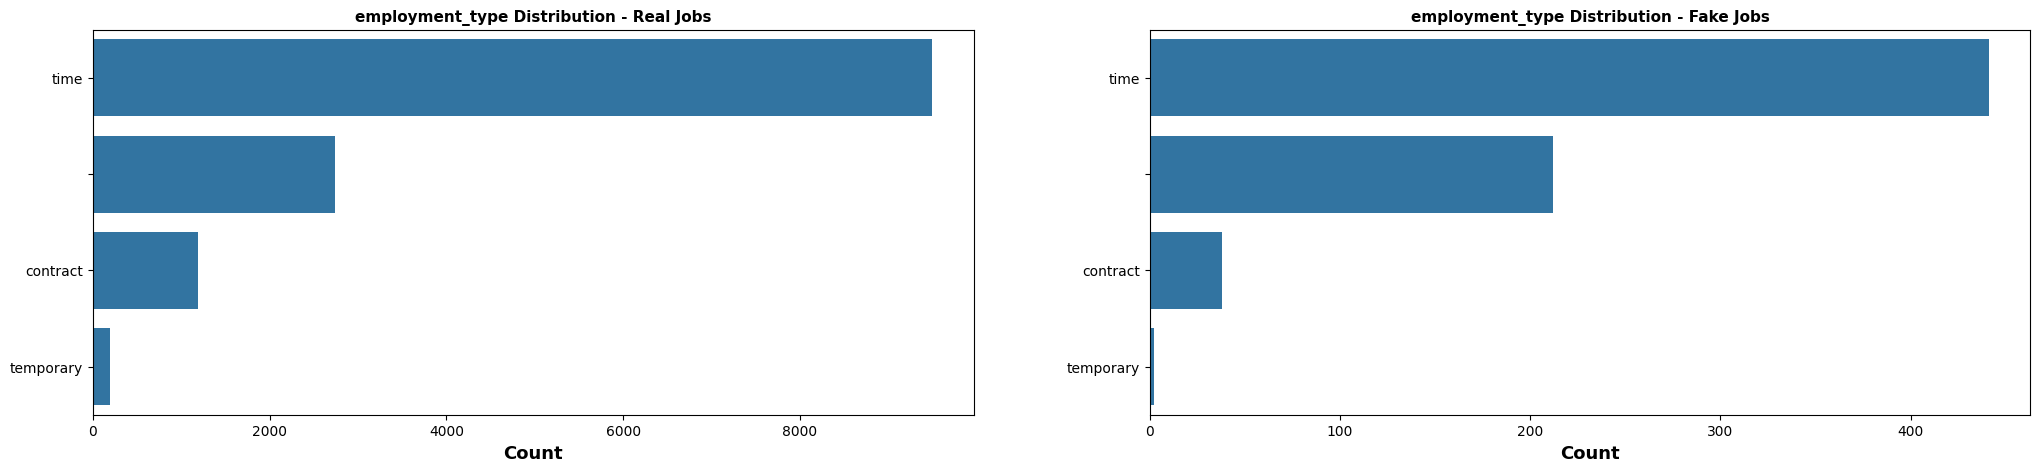

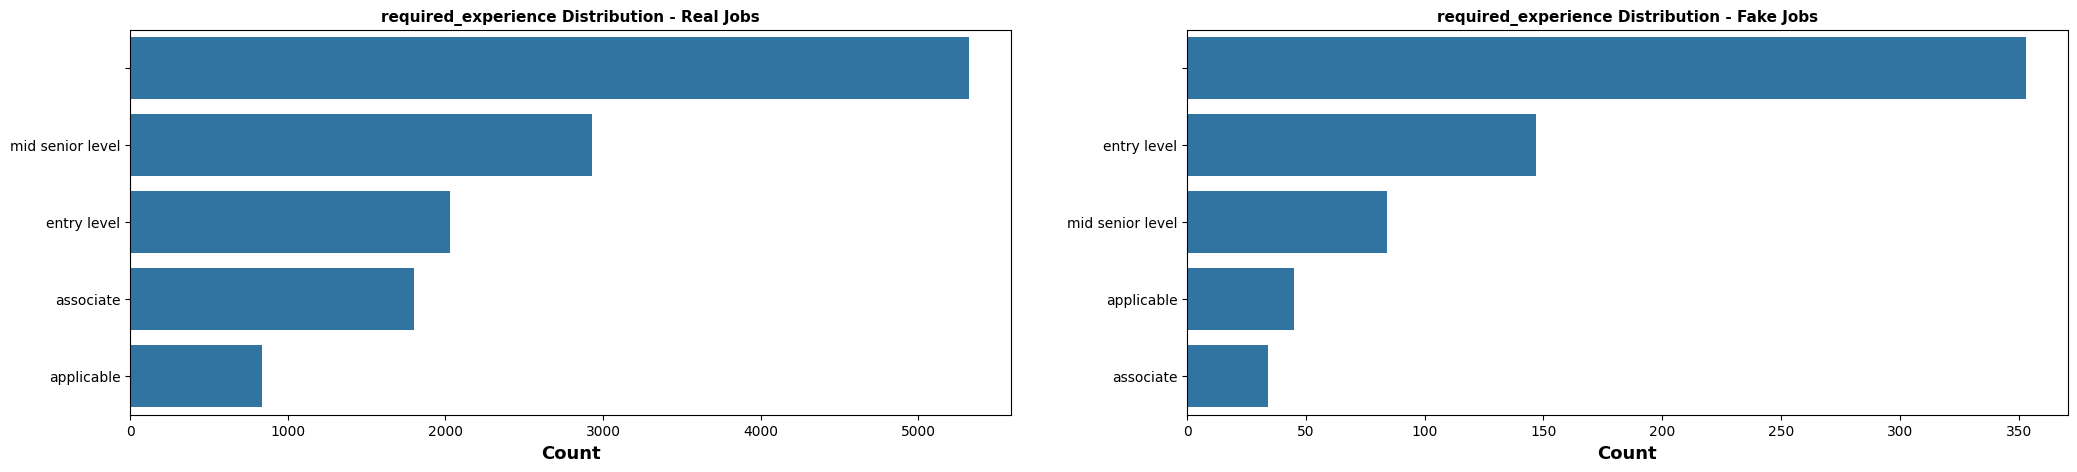

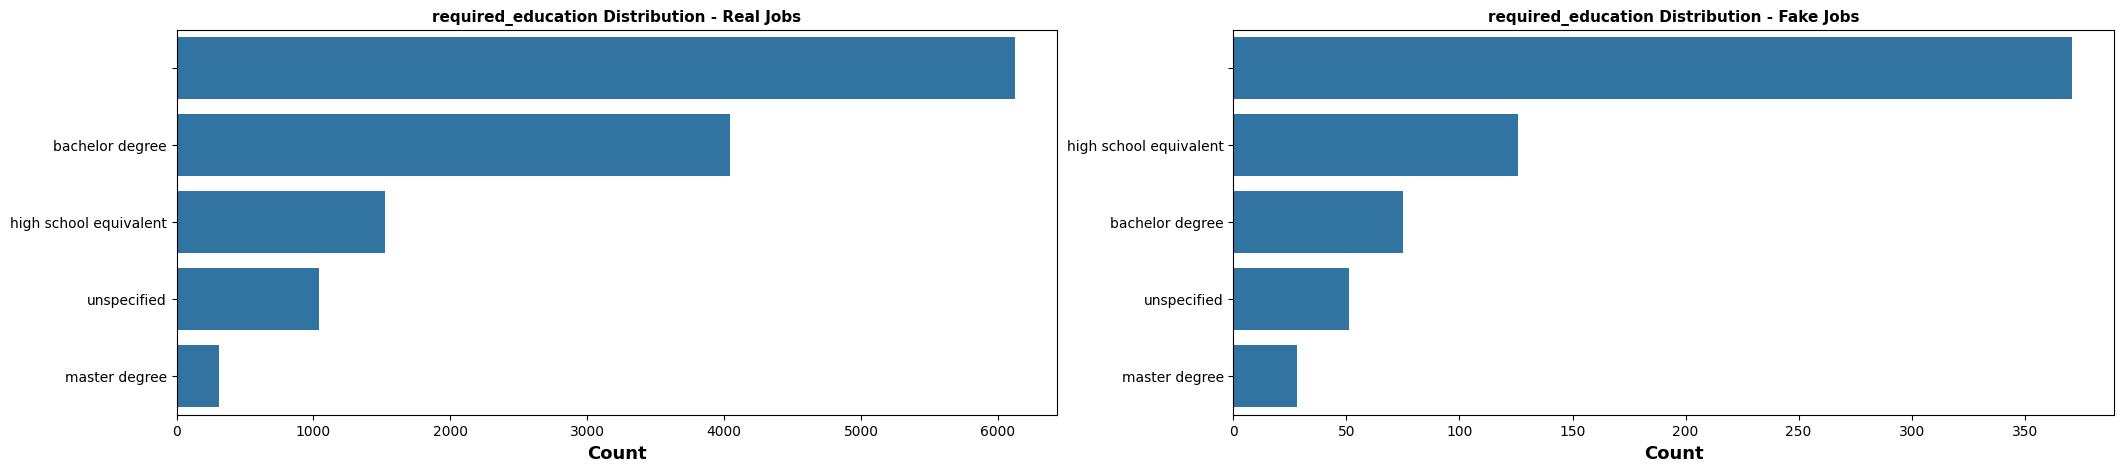

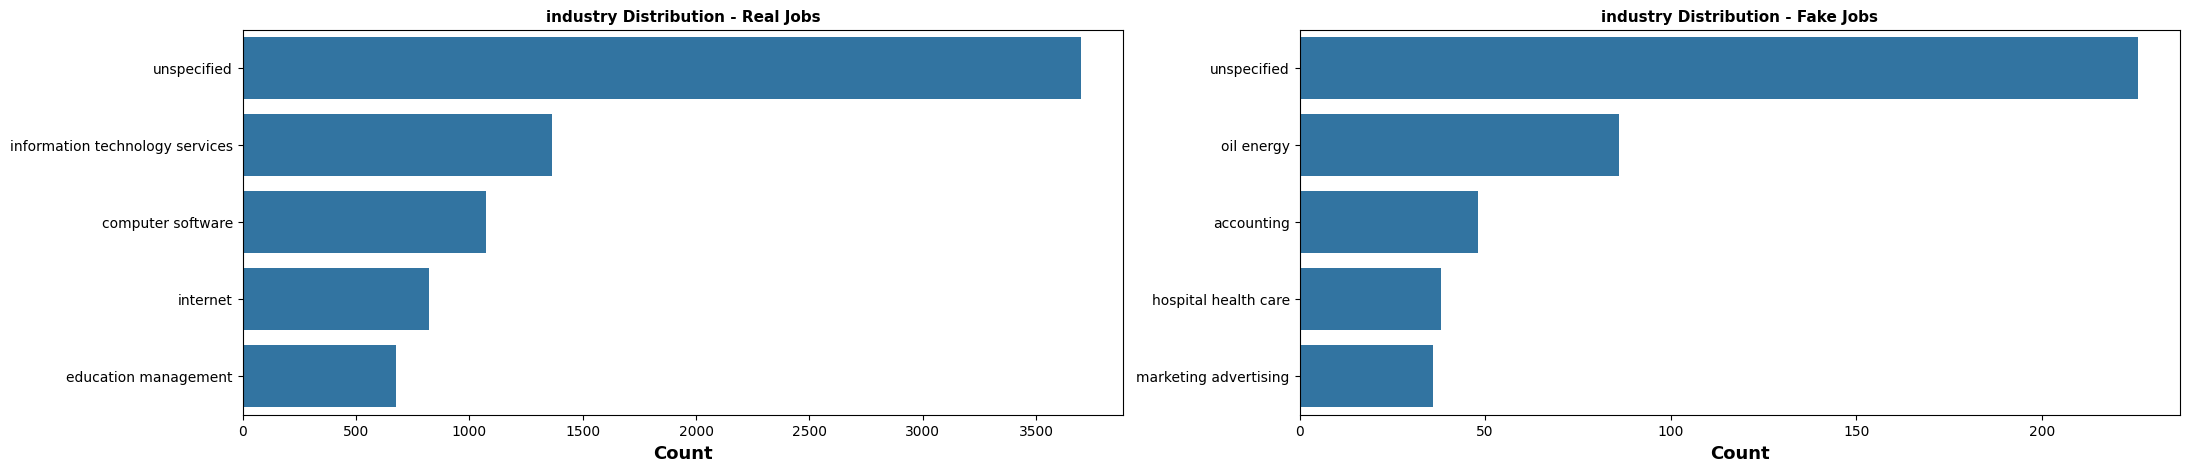

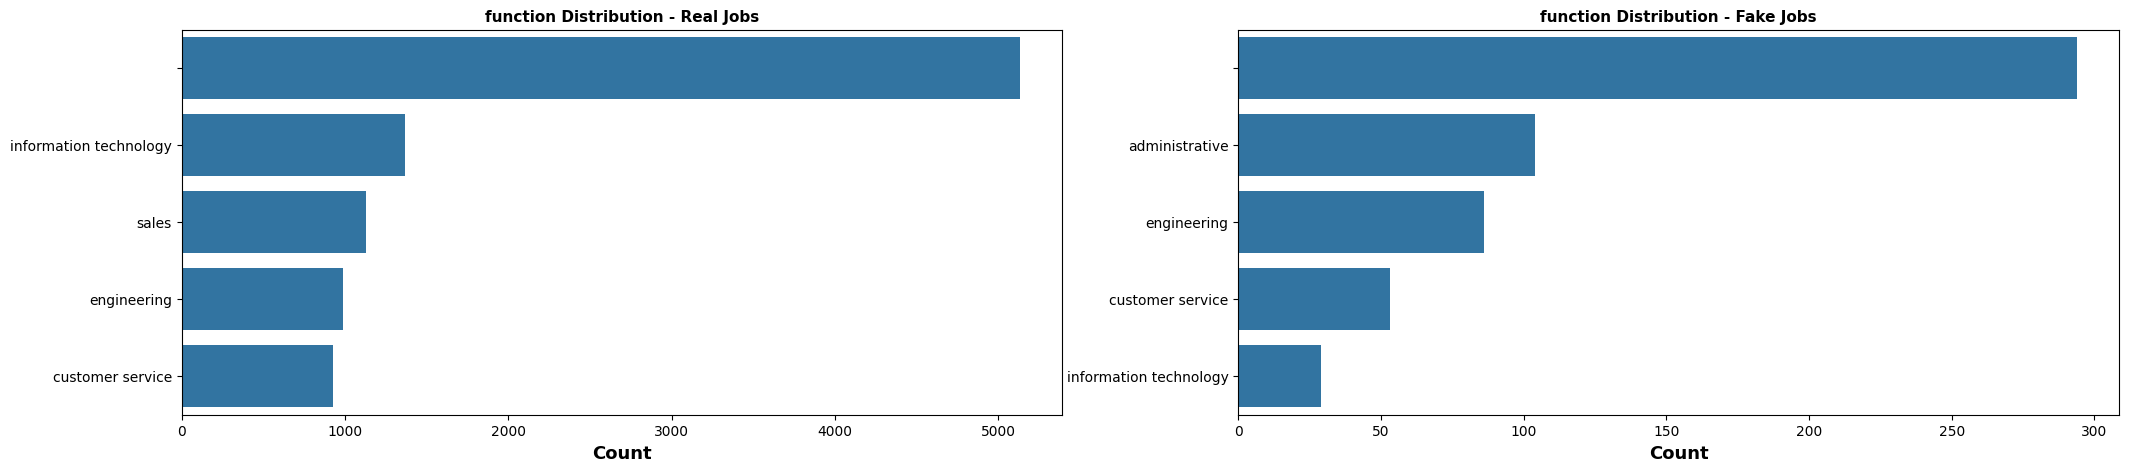

In [ ]:
# Top 5
dist_cols = ["employment_type", "required_experience", "required_education",
             "industry", "function"]

for i in dist_cols:
  distribution_vis(i)

In [ ]:
def location(col):
  fig, axarr = plt.subplots(1, 2,figsize = (17,5))
  ax1 = axarr[0]
  ax2 = axarr[1]

  country1=df[df["fraudulent"] == True][col].value_counts()[:5]
  country2=df[df["fraudulent"] == False][col].value_counts()[:5]

  labels1 = country1.index
  labels2 = country2.index

  ax1.pie(country1, shadow=True, startangle=180, labels= labels1,  autopct='%1.1f%%',pctdistance=0.7)
  ax1.axis('equal')
  ax1.set_title('Fake Job Post', y=-0.1 ,fontdict = {'fontsize' : 13, 'fontweight' : 'bold'})
  #ax1.legend(labels1, loc = "upper right")
  ax1.axis('equal')

  ax2.pie(country2, shadow=True, startangle=180, labels= labels2,   autopct='%1.1f%%',pctdistance=0.7)
  ax2.axis('equal')
  ax2.set_title('Real Job Post', y=-0.1 , fontdict = {'fontsize' : 13, 'fontweight' : 'bold'})
  #ax2.legend(labels2, loc = "upper right")
  ax2.axis('equal')

  fig.suptitle(col, fontweight='bold', fontsize= 19)

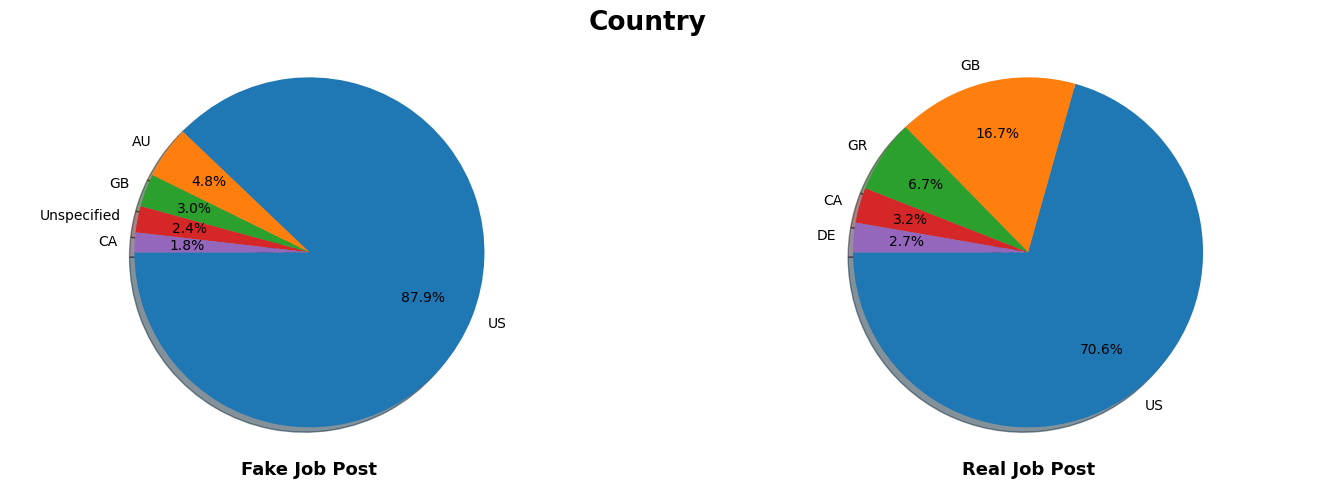

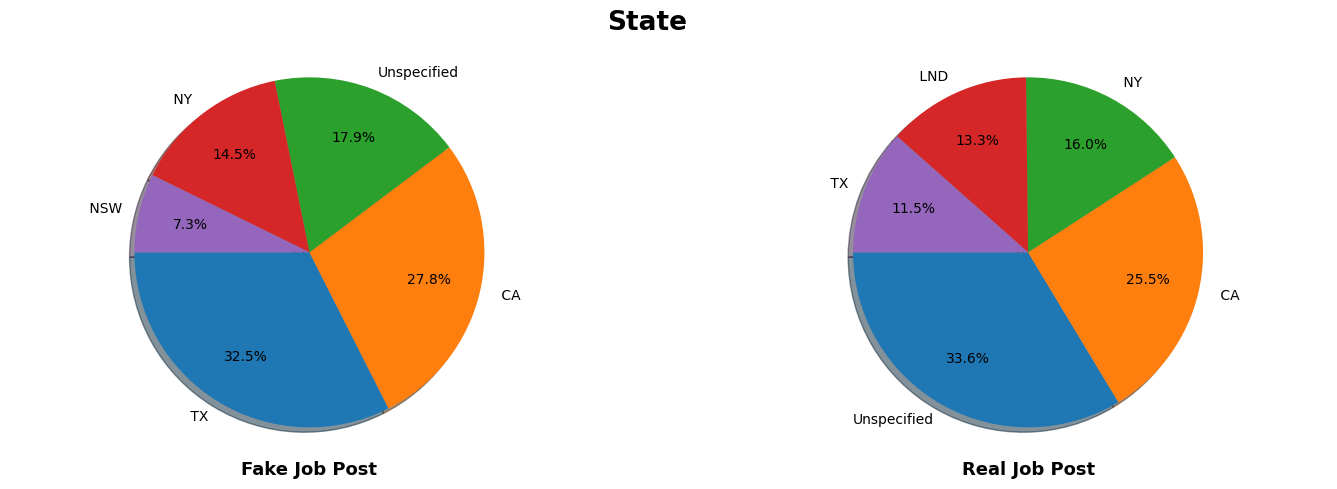

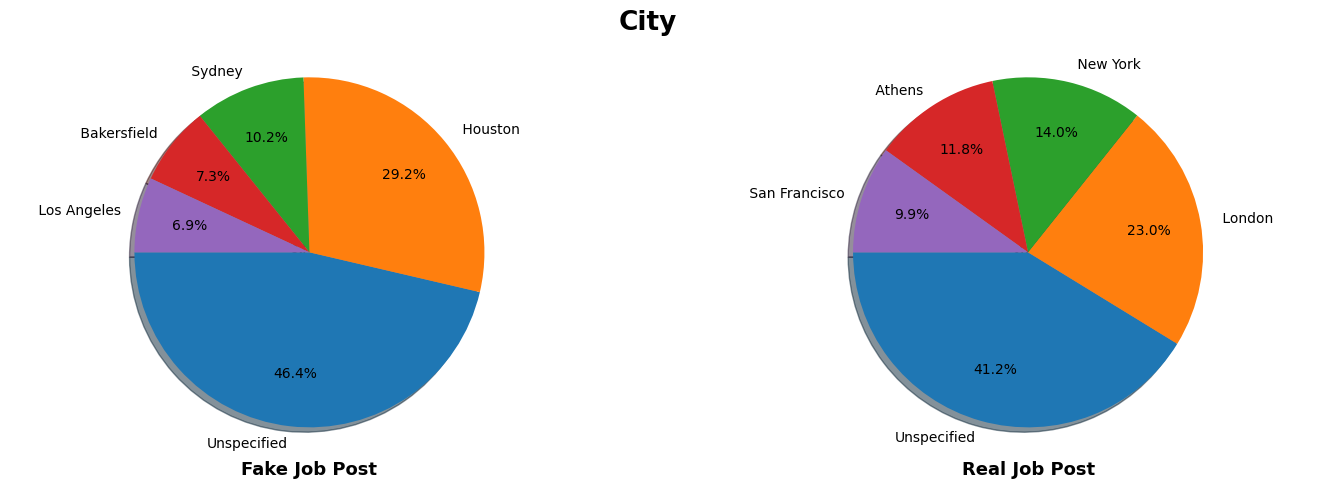

In [ ]:
loc = ['Country','State','City']

for i in loc:
 location(i)

## **Characters Visualization**

In [ ]:
def char_vis(Col):
  fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(15, 3), dpi=100)
  length=df[df["fraudulent"]==True][Col].str.len()
  ax1.hist(length,bins = 10,color='darkorange')
  ax1.set_title('Fake Job Post' ,fontsize=13, fontweight='bold')
  ax1.set_xlabel('No. of Characters', fontsize=11, fontweight='bold')
  ax1.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')

  length=df[df["fraudulent"]==False][Col].str.len()
  ax2.hist(length, bins = 10)
  ax2.set_title('Real Job Post' ,fontsize=13 , fontweight='bold')
  ax2.set_xlabel('No. of Characters', fontsize=11, fontweight='bold')
  ax2.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')

  fig.suptitle(f'Characters in {Col}', fontsize=15, fontweight='bold')
  plt.show()

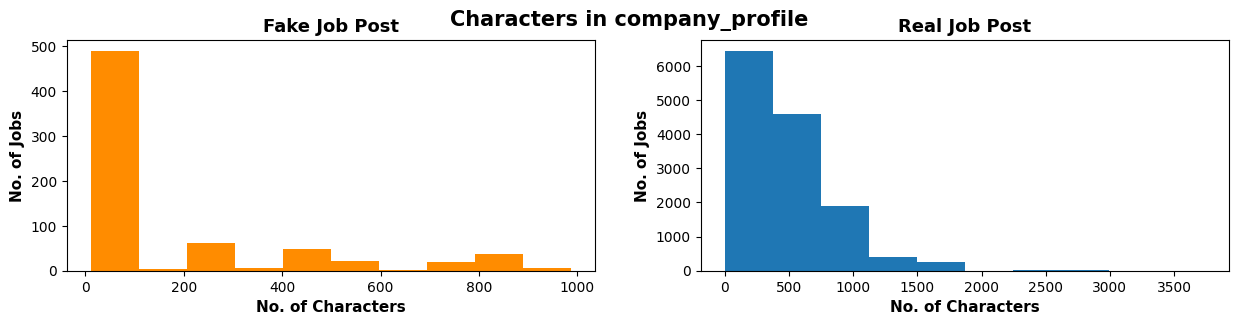

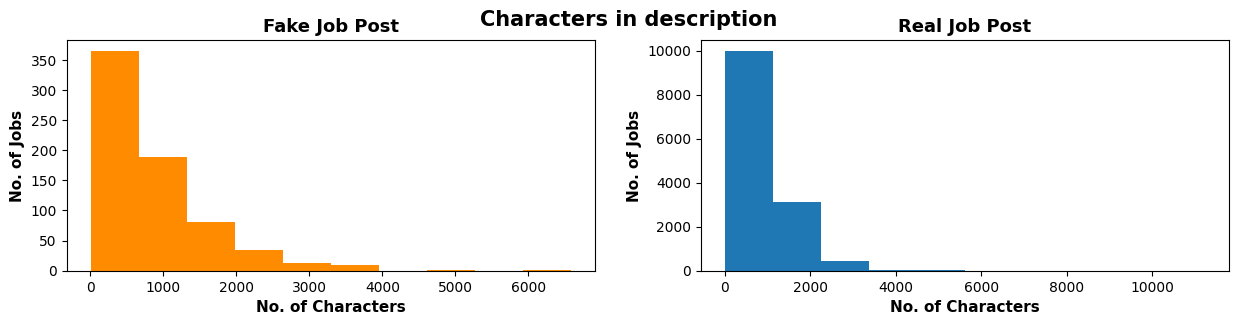

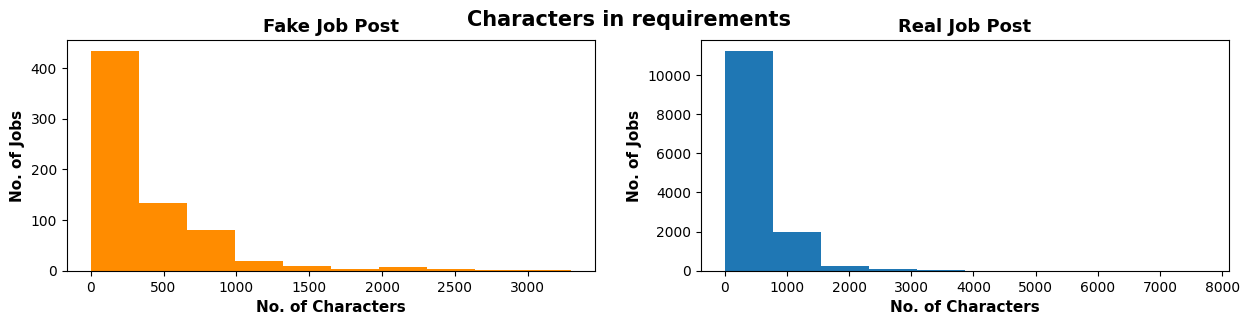

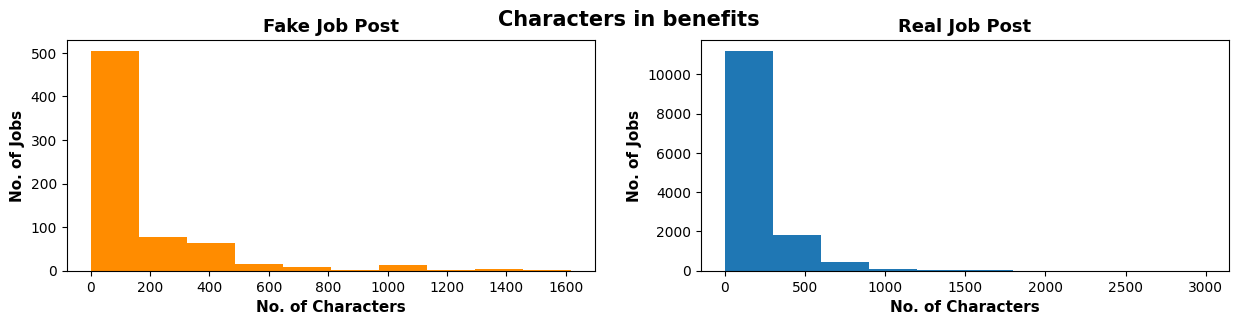

In [ ]:
col_char_vis = ['company_profile','description','requirements','benefits']
for i in col_char_vis:
 char_vis(i)
 print()

From the above graph, we can infer that   

<b><i>
              
*   Fake Job Posts has less characters however the real Job posts has more characters for the company_profile column
*   The distribution of the characters in the description column is almost same for both the fake and the real job posts. But, for few fake job posts the count goes till 3000
             
</i></b>

## **Words Visualization**

In [ ]:
def word_vis(Col):
  fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(15, 3), dpi=100)
  length=df[df["fraudulent"]==True][Col].str.split().map(lambda x: len(x))
  ax1.hist(length,bins = 10,color='darkorange')
  ax1.set_title('Fake Job Post' ,fontsize=13, fontweight='bold')
  ax1.set_xlabel('No. of Words', fontsize=11, fontweight='bold')
  ax1.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')

  length=df[df["fraudulent"]==False][Col].str.split().map(lambda x: len(x))
  ax2.hist(length, bins = 10)
  ax2.set_title('Real Job Post' ,fontsize=13 , fontweight='bold')
  ax2.set_xlabel('No. of Words', fontsize=11, fontweight='bold')
  ax2.set_ylabel('No. of Jobs', fontsize=11, fontweight='bold')
  fig.suptitle(f'Words in {Col}', fontsize=15, fontweight='bold')

  plt.show()

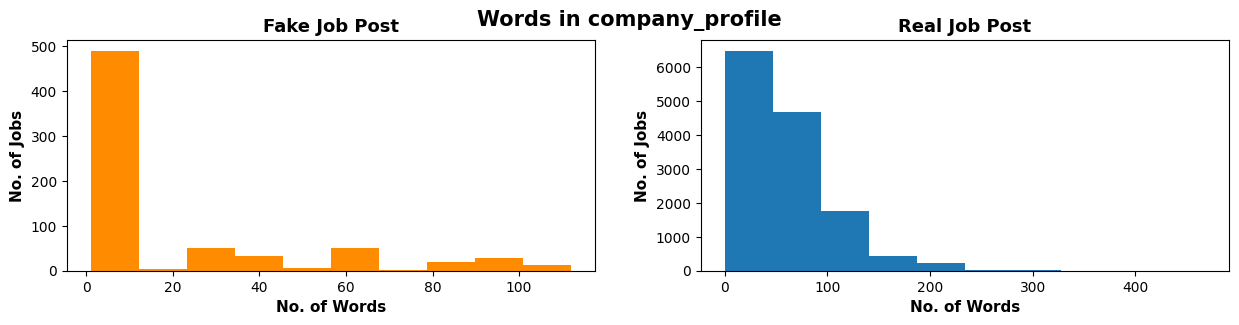

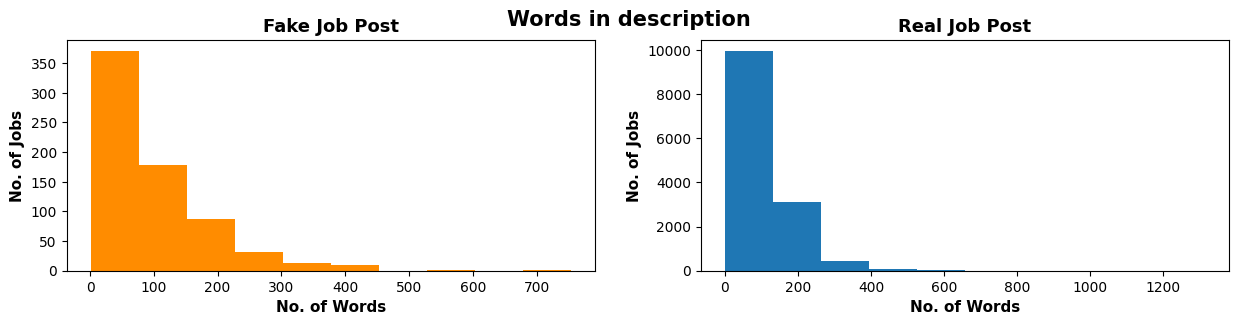

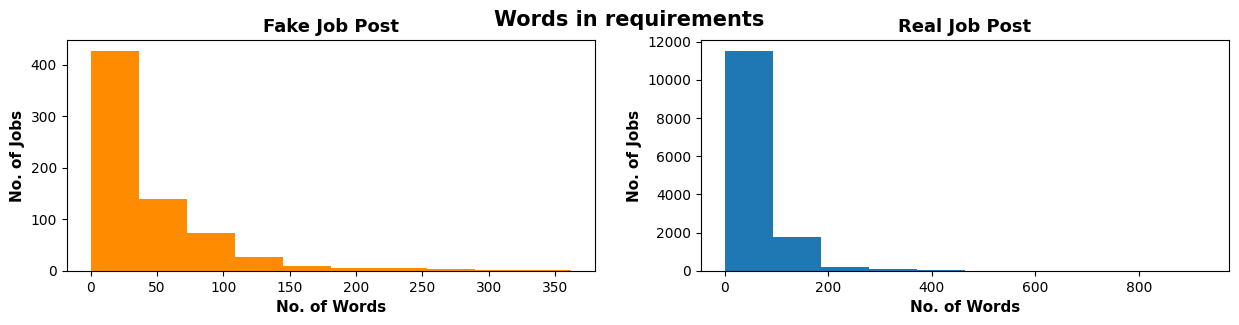

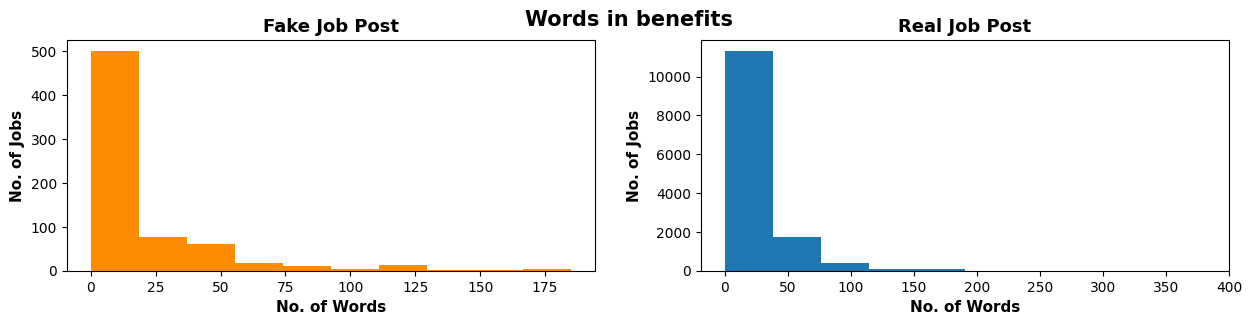

In [ ]:
col_word_vis = ['company_profile','description','requirements','benefits']
for i in col_word_vis:
 word_vis(i)
 print()

## **Map Visualization - Total Job Posting Ads**

In [ ]:
country_code_mapping = {"BD": "BGD", "BE": "BEL", "BF": "BFA", "BG": "BGR", "BA": "BIH", "BB": "BRB", "WF": "WLF", "BL": "BLM", "BM": "BMU", "BN": "BRN", "BO": "BOL", "BH": "BHR", "BI": "BDI", "BJ": "BEN", "BT": "BTN", "JM": "JAM", "BV": "BVT", "BW": "BWA", "WS": "WSM", "BQ": "BES", "BR": "BRA", "BS": "BHS", "JE": "JEY", "BY": "BLR", "BZ": "BLZ", "RU": "RUS", "RW": "RWA", "RS": "SRB", "TL": "TLS", "RE": "REU", "TM": "TKM", "TJ": "TJK", "RO": "ROU", "TK": "TKL", "GW": "GNB", "GU": "GUM", "GT": "GTM", "GS": "SGS", "GR": "GRC", "GQ": "GNQ", "GP": "GLP", "JP": "JPN", "GY": "GUY", "GG": "GGY", "GF": "GUF", "GE": "GEO", "GD": "GRD", "GB": "GBR", "GA": "GAB", "SV": "SLV", "GN": "GIN", "GM": "GMB", "GL": "GRL", "GI": "GIB", "GH": "GHA", "OM": "OMN", "TN": "TUN", "JO": "JOR", "HR": "HRV", "HT": "HTI", "HU": "HUN", "HK": "HKG", "HN": "HND", "HM": "HMD", "VE": "VEN", "PR": "PRI", "PS": "PSE", "PW": "PLW", "PT": "PRT", "SJ": "SJM", "PY": "PRY", "IQ": "IRQ", "PA": "PAN", "PF": "PYF", "PG": "PNG", "PE": "PER", "PK": "PAK", "PH": "PHL", "PN": "PCN", "PL": "POL", "PM": "SPM", "ZM": "ZMB", "EH": "ESH", "EE": "EST", "EG": "EGY", "ZA": "ZAF", "EC": "ECU", "IT": "ITA", "VN": "VNM", "SB": "SLB", "ET": "ETH", "SO": "SOM", "ZW": "ZWE", "SA": "SAU", "ES": "ESP", "ER": "ERI", "ME": "MNE", "MD": "MDA", "MG": "MDG", "MF": "MAF", "MA": "MAR", "MC": "MCO", "UZ": "UZB", "MM": "MMR", "ML": "MLI", "MO": "MAC", "MN": "MNG", "MH": "MHL", "MK": "MKD", "MU": "MUS", "MT": "MLT", "MW": "MWI", "MV": "MDV", "MQ": "MTQ", "MP": "MNP", "MS": "MSR", "MR": "MRT", "IM": "IMN", "UG": "UGA", "TZ": "TZA", "MY": "MYS", "MX": "MEX", "IL": "ISR", "FR": "FRA", "IO": "IOT", "SH": "SHN", "FI": "FIN", "FJ": "FJI", "FK": "FLK", "FM": "FSM", "FO": "FRO", "NI": "NIC", "NL": "NLD", "NO": "NOR", "NA": "NAM", "VU": "VUT", "NC": "NCL", "NE": "NER", "NF": "NFK", "NG": "NGA", "NZ": "NZL", "NP": "NPL", "NR": "NRU", "NU": "NIU", "CK": "COK", "XK": "XKX", "CI": "CIV", "CH": "CHE", "CO": "COL", "CN": "CHN", "CM": "CMR", "CL": "CHL", "CC": "CCK", "CA": "CAN", "CG": "COG", "CF": "CAF", "CD": "COD", "CZ": "CZE", "CY": "CYP", "CX": "CXR", "CR": "CRI", "CW": "CUW", "CV": "CPV", "CU": "CUB", "SZ": "SWZ", "SY": "SYR", "SX": "SXM", "KG": "KGZ", "KE": "KEN", "SS": "SSD", "SR": "SUR", "KI": "KIR", "KH": "KHM", "KN": "KNA", "KM": "COM", "ST": "STP", "SK": "SVK", "KR": "KOR", "SI": "SVN", "KP": "PRK", "KW": "KWT", "SN": "SEN", "SM": "SMR", "SL": "SLE", "SC": "SYC", "KZ": "KAZ", "KY": "CYM", "SG": "SGP", "SE": "SWE", "SD": "SDN", "DO": "DOM", "DM": "DMA", "DJ": "DJI", "DK": "DNK", "VG": "VGB", "DE": "DEU", "YE": "YEM", "DZ": "DZA", "US": "USA", "UY": "URY", "YT": "MYT", "UM": "UMI", "LB": "LBN", "LC": "LCA", "LA": "LAO", "TV": "TUV", "TW": "TWN", "TT": "TTO", "TR": "TUR", "LK": "LKA", "LI": "LIE", "LV": "LVA", "TO": "TON", "LT": "LTU", "LU": "LUX", "LR": "LBR", "LS": "LSO", "TH": "THA", "TF": "ATF", "TG": "TGO", "TD": "TCD", "TC": "TCA", "LY": "LBY", "VA": "VAT", "VC": "VCT", "AE": "ARE", "AD": "AND", "AG": "ATG", "AF": "AFG", "AI": "AIA", "VI": "VIR", "IS": "ISL", "IR": "IRN", "AM": "ARM", "AL": "ALB", "AO": "AGO", "AQ": "ATA", "AS": "ASM", "AR": "ARG", "AU": "AUS", "AT": "AUT", "AW": "ABW", "IN": "IND", "AX": "ALA", "AZ": "AZE", "IE": "IRL", "ID": "IDN", "UA": "UKR", "QA": "QAT", "MZ": "MOZ"}

In [ ]:
df['Country']=df['Country'].apply(lambda x:country_code_mapping[x] if x!='Unspecified' else 'Unspecified')


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = df['Country'].value_counts().index,
    z = df['Country'].value_counts().values,
    text = df['Country'].value_counts().index,
    colorscale = 'Blues',
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Job Ads',
))

fig.update_layout(
    title_text='Total Job Post Ads',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),

)

fig.show()


## **Map Visualization - Fake Job Posting Ads**

In [ ]:
from collections import OrderedDict

fraud_list=df[df['fraudulent']==True]['Country'].value_counts()[:10].to_dict()
total_count_list=df['Country'].value_counts()[:10].to_dict()
# total_count_list = Fraud_Job_df[Fraud_Job_df['fraudulent']==True].size
percent_fraud_dict={}
for country in total_count_list.keys():
    if country in fraud_list:
        percent_fraud_dict[country]=fraud_list[country]/Fraud_Job_df[Fraud_Job_df["fraudulent"] == True]["fraudulent"].size*100
    else:
        percent_fraud_dict[country]=0
percent_fraud_dict=OrderedDict(sorted(percent_fraud_dict.items()))

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = list(percent_fraud_dict.keys()),
    z = list(percent_fraud_dict.values()),
    text =  list(percent_fraud_dict.keys()),
    autocolorscale=False,
    colorscale = 'tealrose',
    marker_line_color='darkgray',
    marker_line_width=1,
    colorbar_title = 'Job Ads percent'
))

fig.update_layout(
    title_text='Percentage of fraudulent job ads',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),

)

fig.show()

In [ ]:
filt = df["fraudulent"] == True

df[df["fraudulent"] == False]["fraudulent"].size

13611

In [ ]:
df[df["fraudulent"] == False]["Country"].value_counts()

Country
USA            7940
GBR            1875
GRC             754
CAN             365
DEU             305
NZL             269
Unspecified     264
IND             217
AUS             139
NLD             108
PHL             104
BEL              90
IRL              89
SGP              64
POL              61
HKG              60
ISR              57
FRA              55
EST              53
ESP              51
ARE              46
EGY              45
SWE              38
DNK              36
ROU              36
ZAF              34
BRA              28
ITA              27
FIN              23
LTU              20
PAK              20
TUR              17
JPN              17
QAT              15
BGR              15
RUS              14
CHN              12
PRT              12
MUS              11
AUT              11
CHE              11
UKR              11
CYP              11
MEX              11
NGA              10
SAU              10
IDN               9
BLR               8
MYS               8
HUN               8
THA               7
KOR               7
NOR               7
PAN               7
LUX               7
IRQ               6
ARG               6
MLT               6
CZE               5
KEN               5
SRB               5
VNM               4
TTO               4
LVA               4
BHR               3
ARM               2
ISL               2
SVK               2
LKA               2
TWN               2
TUN               2
BGD               2
NIC               2
VIR               2
KWT               2
SLV               1
ZMB               1
CHL               1
HRV               1
UGA               1
KHM               1
JAM               1
GHA               1
SVN               1
ALB               1
MAR               1
KAZ               1
SDN               1
PER               1
Name: count, dtype: int64

(array([13611.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   693.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

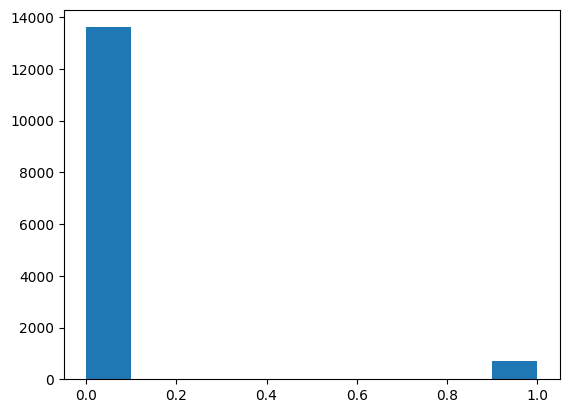

In [ ]:
plt.hist(x=df["fraudulent"].astype(int))

# **Machine Learning Modeling**

For Binary classification, Information-based models like decision trees, Error based models like logistic regression, Similarity-based models like K-nearest neighbor(KNN), Probability-based models like Naive Bayes Tree, are available for solving such ML problems

We will be using below models for comparison and evaluation

<li> Linear Support Vector Classification </li>
<li>Gradient Boosting </li>
<li>Gaussian Naive Bayes</li>
<li>Logistic Regression</li>
<li>KNeighbors</li>
<li>Random Forest</li>
<li>XGBoost</li>


To overcome the shortcomings of having a highly unbalanced dataset, we have performed sampling on the dataset. Below are the three types of sampling that were done.

In [ ]:
# Transforming the features

from sklearn.preprocessing import LabelEncoder

col_x = ['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'Country', 'State', 'City' ]

label=LabelEncoder()

for col in col_x:

  df[col]=label.fit_transform(df[col])

## **Splitting the dataset into training. validation and test**

In [ ]:
# Reading the features and Target values into X and Y respectively

X = df[col_x]
y = df[['fraudulent']]

In [ ]:
# Splitting the data in the ratio of 75 : 25

from sklearn.model_selection import train_test_split


# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

# Split training into validation and training
X_train, X_val, y_train, y_val = train_test_split(
    X_train ,y_train, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
\n% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')


print()
print(f"% Positive class in Validation = {np.round(y_val.value_counts(normalize=True)[1] * 100, 2)}")
# \n% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 4.75

% Positive class in Test  = 4.47

% Positive class in Validation = 5.49


<ipython-input-67-3099558800>:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-67-3099558800>:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-67-3099558800>:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
print()
print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of validation dataset: {X_val.shape}")
print(f"Shape of test dataset: {X_test.shape}")
print()
print()
print(f"Shape of training dataset: {y_train.shape}")
print(f"Shape of validation dataset: {y_val.shape}")
print(f"Shape of test dataset: {y_test.shape}")
print()


Shape of training dataset: (8582, 17)
Shape of validation dataset: (2861, 17)
Shape of test dataset: (2861, 17)


Shape of training dataset: (8582, 1)
Shape of validation dataset: (2861, 1)
Shape of test dataset: (2861, 1)



In [ ]:
# Displaying Model Prediction Summary & Graph

Names = ['LinearSVC' , 'GradientBoostingClassifier', 'GaussianNB', 'LogisticRegression' , 'KNeighborsClassifier',
          'RandomForestClassifier','XGBClassifier']
pred = {'Model Names': Names}
Model_Pred = pd.DataFrame (pred)
Model_Pred['Train Accuracy'] = ''
Model_Pred['Test Accuracy']  = ''
Model_Pred['Precision']      = ''
Model_Pred['Recall']         = ''
Model_Pred['F1 Score']       = ''


def summary_graph():

  print()
  print('\033[1m')
  print("-" * 110)
  print("                                                Model Prediction Summary")
  print("-" * 110)
  print('\033[0m')


  from tabulate import tabulate
  print(tabulate(Model_Pred, headers='keys', tablefmt='psql'))
  print()


  Model_Pred.plot(x ='Model Names', y = ['Train Accuracy' , 'Test Accuracy']
                  ,figsize=(15, 5), marker = 'o')
  plt.title('Comparison of Different Machine Learning models', fontweight='bold'
  , fontsize = 15)
  plt.xlabel('Machine Learning Models', fontweight='bold',labelpad=10
             , fontsize = 13)
  plt.ylabel('Accuracy', fontweight='bold' ,labelpad=10 , fontsize = 13)
  plt.show()

## **Before oversampling**

The Random Forest(RF) and XGBoost model outperforms other models


BEFORE:  SMOTE Oversampling - All features 

---------------------------------------------


Prediction for LinearSVC 

Train Dataset Accuracy : 0.9525 
 Test Dataset Accuracy : 0.9553 
 ROC AUC Score         : 0.5 



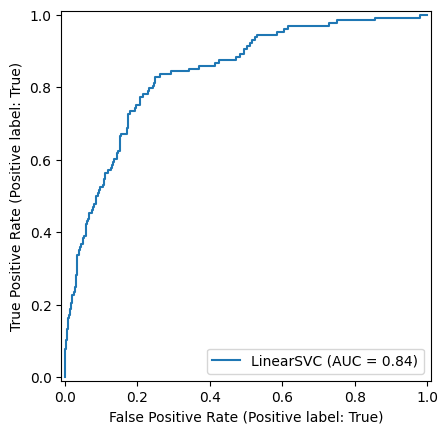


Confusion Matrix  

[[2733  128]
 [   0    0]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2733
        True       0.00      0.00      0.00       128

    accuracy                           0.96      2861
   macro avg       0.48      0.50      0.49      2861
weighted avg       0.91      0.96      0.93      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9793 
 Test Dataset Accuracy : 0.9727 
 ROC AUC Score         : 0.7177 



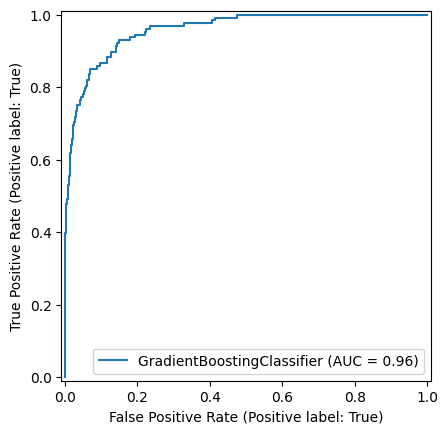


Confusion Matrix  

[[2727   72]
 [   6   56]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.99      2733
        True       0.90      0.44      0.59       128

    accuracy                           0.97      2861
   macro avg       0.94      0.72      0.79      2861
weighted avg       0.97      0.97      0.97      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.9252 
 Test Dataset Accuracy : 0.9318 
 ROC AUC Score         : 0.6888 



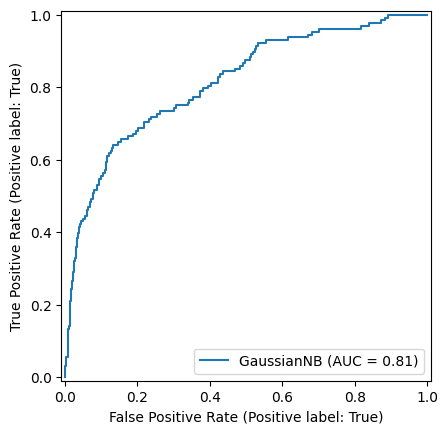


Confusion Matrix  

[[2612   74]
 [ 121   54]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.96      0.96      2733
        True       0.31      0.42      0.36       128

    accuracy                           0.93      2861
   macro avg       0.64      0.69      0.66      2861
weighted avg       0.94      0.93      0.94      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.9521 
 Test Dataset Accuracy : 0.9542 
 ROC AUC Score         : 0.5032 



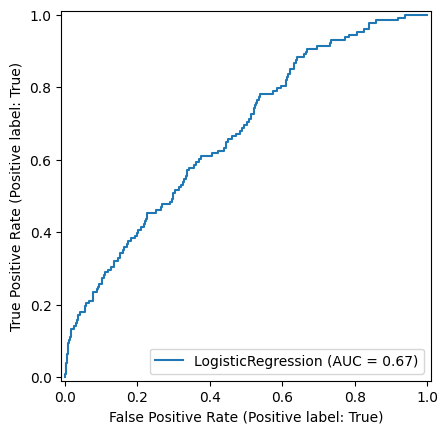


Confusion Matrix  

[[2729  127]
 [   4    1]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      1.00      0.98      2733
        True       0.20      0.01      0.02       128

    accuracy                           0.95      2861
   macro avg       0.58      0.50      0.50      2861
weighted avg       0.92      0.95      0.93      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.9624 
 Test Dataset Accuracy : 0.9546 
 ROC AUC Score         : 0.5853 



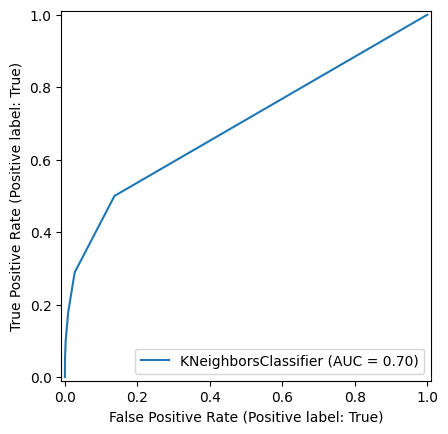


Confusion Matrix  

[[2708  105]
 [  25   23]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.99      0.98      2733
        True       0.48      0.18      0.26       128

    accuracy                           0.95      2861
   macro avg       0.72      0.59      0.62      2861
weighted avg       0.94      0.95      0.94      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9769 
 ROC AUC Score         : 0.7534 



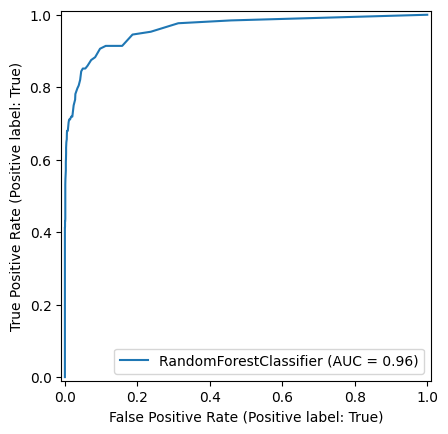


Confusion Matrix  

[[2730   63]
 [   3   65]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2733
        True       0.96      0.51      0.66       128

    accuracy                           0.98      2861
   macro avg       0.97      0.75      0.83      2861
weighted avg       0.98      0.98      0.97      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9773 
 ROC AUC Score         : 0.7833 



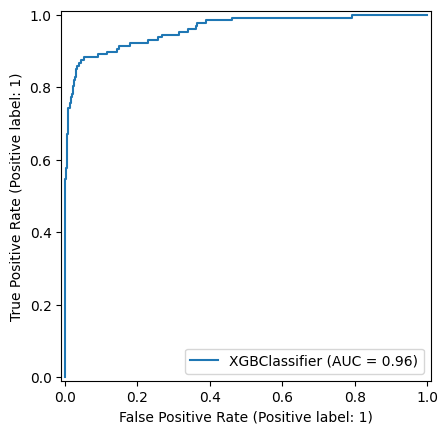


Confusion Matrix  

[[2723   55]
 [  10   73]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2733
        True       0.88      0.57      0.69       128

    accuracy                           0.98      2861
   macro avg       0.93      0.78      0.84      2861
weighted avg       0.98      0.98      0.97      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

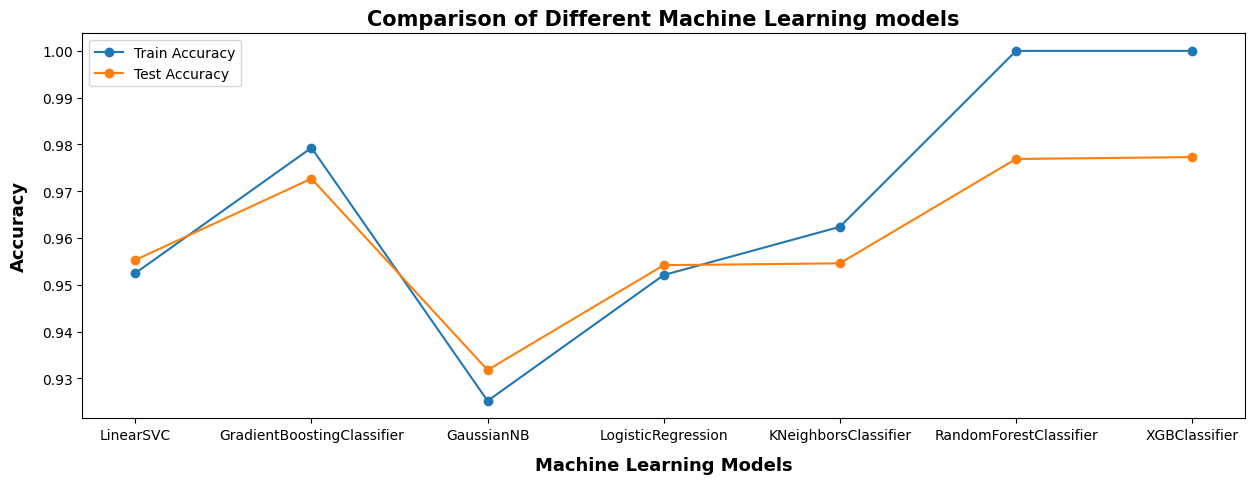

In [ ]:
# Model Prediction

from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings("ignore")

def model_prediction(model, X_train, y_train, X_test, y_test,model_name):

    y_array = np.array(y_train).reshape(len(y_train),)

    model_fitted = model.fit(X_train, y_array)
    print('\033[1m')
    print(f"Prediction for {model_name} ")
    print('\033[0m')

    train_fit = model_fitted.predict(X_train)
    test_fit  = model_fitted.predict(X_test)

    train_accuracy = round(accuracy_score(train_fit,y_train),4)
    test_accuracy  = round(accuracy_score(test_fit,y_test),4)
    precision      = round(precision_score(test_fit,y_test),4)
    recall         = round(recall_score(test_fit,y_test),4)
    f1             = round(f1_score(test_fit,y_test),4)

    roc_auc        = round(roc_auc_score(y_test,test_fit),4)

    print(f"Train Dataset Accuracy : {train_accuracy} ")
    print(f" Test Dataset Accuracy : {test_accuracy} ")
    print(f" ROC AUC Score         : {roc_auc} \n")

    metrics.RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

    print(f"\n Classification Report : \n")
    print(classification_report(y_test,test_fit))


    print()

    return(train_accuracy,test_accuracy,precision,recall,f1)

pred_models_list = [("LinearSVC", LinearSVC()),
                    ("GradientBoostingClassifier",GradientBoostingClassifier()),
                    ("GaussianNB", GaussianNB()),("LogisticRegression", LogisticRegression())
                    ,("KNeighborsClassifier",KNeighborsClassifier())
                    ,("RandomForestClassifier",RandomForestClassifier())
                    ,("XGBClassifier",XGBClassifier())]



print('\033[1m')
print("BEFORE:  SMOTE Oversampling - All features ")
print('\033[0m')
print("-" * 45)
print()
i = 0

for model in pred_models_list:

    train,test,prec,rec,f1_sc = model_prediction(model[1],X_train
                                              , y_train,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i]= train
    Model_Pred['Test Accuracy'][i] = test
    Model_Pred['Precision'] [i]    = prec
    Model_Pred['Recall'][i]        = rec
    Model_Pred['F1 Score'][i]      = f1_sc
    i = i+1


summary_graph()

## **K-fold validation**

Validate that the Random Forest(RF) and XGBoost model outperforms other models

In [ ]:
kNames = ['RandomForestClassifier','XGBClassifier']
kpred = {'Model Names': kNames}
kModel_Pred = pd.DataFrame (kpred)
kModel_Pred['Accuracy']       = ''
kModel_Pred['Precision']      = ''
kModel_Pred['Recall']         = ''
kModel_Pred['F1 Score']       = ''


def ksummary_graph():

  print()
  print('\033[1m')
  print("-" * 81)
  print("                       K-fold Cross : Prediction Summary")
  print("-" * 81)
  print('\033[0m')


  from tabulate import tabulate
  print(tabulate(kModel_Pred, headers='keys', tablefmt='psql'))
  print()


In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)

def validation_test(model_test):
 acc=[]
 Recall=[]
 Precision=[]
 F1_score=[]

 for train_index,test_index in kf.split(X):
    X_train,X_test,y_train,y_test=X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
    model_test.fit(X_train,y_train)
    pred_rf=model_test.predict(X_test)

    accur_rf=round(accuracy_score(y_test,pred_rf),4)
    acc.append(accur_rf)

    re=round(recall_score(y_test,pred_rf),4)
    Recall.append(re)

    pre=round(precision_score(y_test,pred_rf),4)
    Precision.append(pre)

    f1=round(f1_score(y_test,pred_rf),4)
    F1_score.append(f1)

 re  = np.mean(Recall)
 pre = np.mean(Precision)
 accur_rf = np.mean(acc)
 f1 = np.mean(F1_score)




 print(f"    Recall Score : {np.mean(re):.4f}")
 print(f" Precision Score : {np.mean(pre):.4f}")
 print(f"  Accuracy Score : {np.mean(accur_rf):.4f}")
 print(f"        F1 Score : {np.mean(f1):.4f}\n")

 return(accur_rf,re,pre,f1)

print('\033[1m')
print(f"Random Forest Classifier \n")
print('\033[0m')
RFE=RandomForestClassifier(n_estimators=100,random_state=1)
accur_rf,re,pre,f1 = validation_test(RFE)
kModel_Pred['Accuracy'][0]  = accur_rf
kModel_Pred['Precision'][0] = re
kModel_Pred['Recall'][0]    = pre
kModel_Pred['F1 Score'][0]  = f1


print('\033[1m')
print(f"XGBOOST Classifier \n")
print('\033[0m')
accur_rf,re,pre,f1 = validation_test(XGBClassifier())
kModel_Pred['Accuracy'][1]  = accur_rf
kModel_Pred['Precision'][1] = re
kModel_Pred['Recall'][1]    = pre
kModel_Pred['F1 Score'][1]  = f1



ksummary_graph()


Random Forest Classifier 


    Recall Score : 0.6183
 Precision Score : 0.9476
  Accuracy Score : 0.9798
        F1 Score : 0.7476


XGBOOST Classifier 


    Recall Score : 0.6734
 Precision Score : 0.9144
  Accuracy Score : 0.9810
        F1 Score : 0.7744



---------------------------------------------------------------------------------
                       K-fold Cross : Prediction Summary
---------------------------------------------------------------------------------

+----+------------------------+------------+-------------+----------+------------+
|    | Model Names            |   Accuracy |   Precision |   Recall |   F1 Score |
|----+------------------------+------------+-------------+----------+------------|
|  0 | RandomForestClassifier |    0.97977 |     0.61832 |  0.94762 |    0.74764 |
|  1 | XGBClassifier          |    0.98096 |     0.67341 |  0.91445 |    0.77439 |
+----+------------------------+------------+-------------+----------+------------+



## **Performing Sampling for correcting the imbalance in data**

## **Oversampling with SMOTE**

The sampling technique aims to increase the number of samples of the class that has a lesser number of samples. In our case, the “fraudulent” class had to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# X_sm, y_sm = sm.fit_resample(np.array(X_train).ravel(), np.array(y_train).ravel())
X_sm, y_sm = sm.fit_resample(X_train, y_train)


print(f'''Shape of X before SMOTE : {X.shape}
 Shape of X after SMOTE : {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
print(np.sum(y_sm==1)/len(y_sm) * 100)
print(np.sum(y_sm==0)/len(y_sm) * 100)

# Convert to dataframe for this version of SMOTE (Python 3.7)
X_sm_df = pd.DataFrame(data=X_sm,columns=np.array(X.columns))
y_sm = np.array(y_sm).reshape(len(y_sm),)


Shape of X before SMOTE : (14304, 17)
 Shape of X after SMOTE : (16348, 17)

Balance of positive and negative classes (%):
fraudulent    50.0
dtype: float64
fraudulent    50.0
dtype: float64


## **Random Undersampling**

This sampling technique aims to reduce the number of samples of the class that has the majority of samples. Here, in our case, the “non-fraudulent” class has the highest samples and this will reduce the number of samples in the non-fraudulent class.

Shape of X before SMOTE : (14304, 17)
 Shape of X after SMOTE : (1224, 17)

Balance of positive and negative classes (%):
fraudulent    33.333333
dtype: float64
fraudulent    66.666667
dtype: float64

Prediction for LinearSVC 

Train Dataset Accuracy : 0.7843 
 Test Dataset Accuracy : 0.8301 
 ROC AUC Score         : 0.7435 



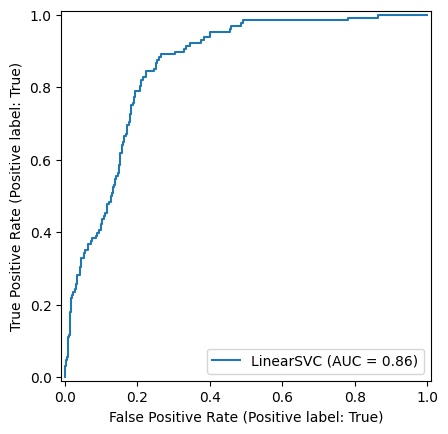


Confusion Matrix  

[[2292   45]
 [ 441   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      2733
        True       0.16      0.65      0.25       128

    accuracy                           0.83      2861
   macro avg       0.57      0.74      0.58      2861
weighted avg       0.94      0.83      0.88      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9592 
 Test Dataset Accuracy : 0.9144 
 ROC AUC Score         : 0.8435 



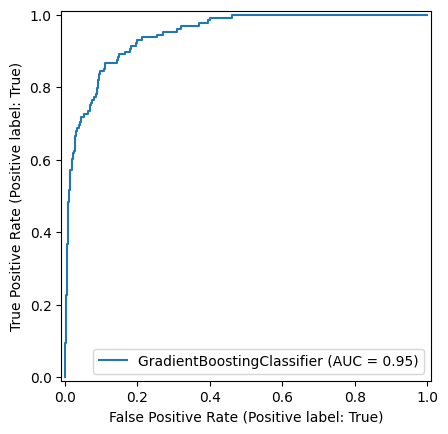


Confusion Matrix  

[[2518   30]
 [ 215   98]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2733
        True       0.31      0.77      0.44       128

    accuracy                           0.91      2861
   macro avg       0.65      0.84      0.70      2861
weighted avg       0.96      0.91      0.93      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7655 
 Test Dataset Accuracy : 0.8099 
 ROC AUC Score         : 0.7404 



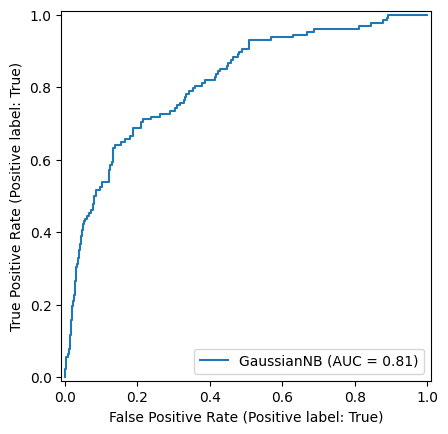


Confusion Matrix  

[[2232   43]
 [ 501   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.82      0.89      2733
        True       0.15      0.66      0.24       128

    accuracy                           0.81      2861
   macro avg       0.56      0.74      0.56      2861
weighted avg       0.94      0.81      0.86      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7149 
 Test Dataset Accuracy : 0.8469 
 ROC AUC Score         : 0.5885 



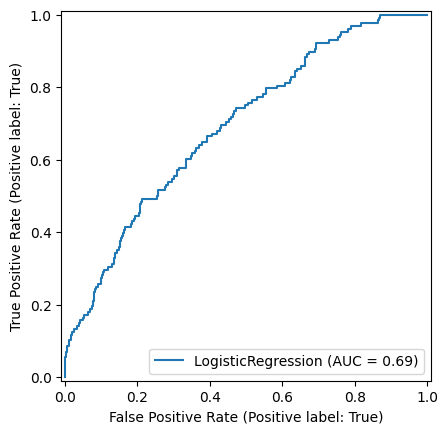


Confusion Matrix  

[[2384   89]
 [ 349   39]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.87      0.92      2733
        True       0.10      0.30      0.15       128

    accuracy                           0.85      2861
   macro avg       0.53      0.59      0.53      2861
weighted avg       0.93      0.85      0.88      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.8162 
 Test Dataset Accuracy : 0.8039 
 ROC AUC Score         : 0.6665 



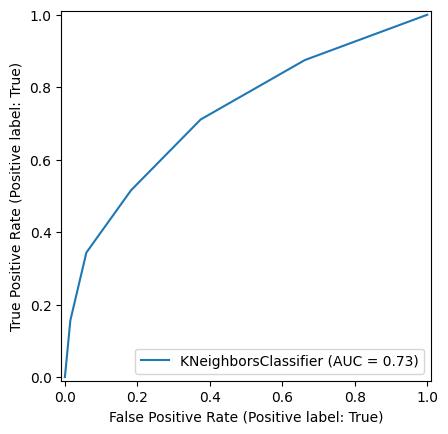


Confusion Matrix  

[[2234   62]
 [ 499   66]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2733
        True       0.12      0.52      0.19       128

    accuracy                           0.80      2861
   macro avg       0.54      0.67      0.54      2861
weighted avg       0.93      0.80      0.86      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9329 
 ROC AUC Score         : 0.8643 



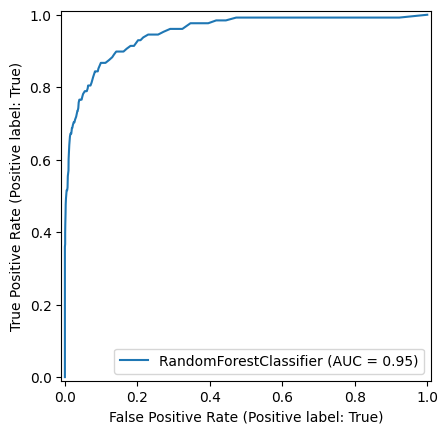


Confusion Matrix  

[[2568   27]
 [ 165  101]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      2733
        True       0.38      0.79      0.51       128

    accuracy                           0.93      2861
   macro avg       0.68      0.86      0.74      2861
weighted avg       0.96      0.93      0.94      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9249 
 ROC AUC Score         : 0.8713 



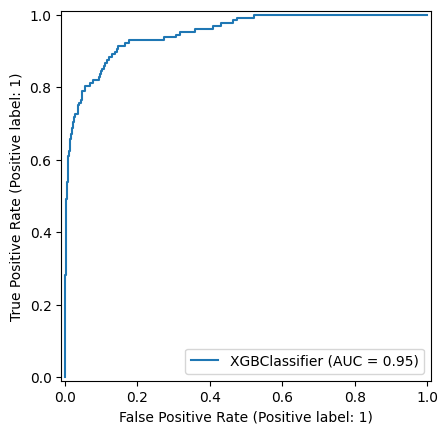


Confusion Matrix  

[[2542   24]
 [ 191  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.35      0.81      0.49       128

    accuracy                           0.92      2861
   macro avg       0.67      0.87      0.73      2861
weighted avg       0.96      0.92      0.94      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

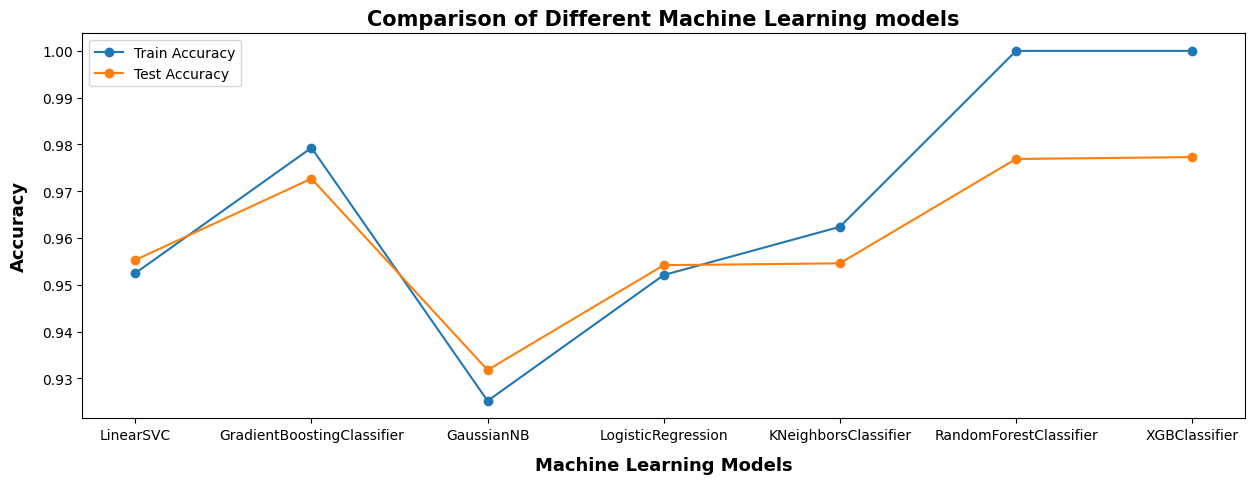

In [ ]:
# UnderSampling - SMOTE

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_train, y_train)


# # X_sm, y_sm = sm.fit_resample(np.array(X_train).ravel(), np.array(y_train).ravel())
# X_sm, y_sm = undersample.fit_resample(X_train, y_train)


print(f'''Shape of X before SMOTE : {X.shape}
 Shape of X after SMOTE : {X_under.shape}''')

print('\nBalance of positive and negative classes (%):')
print(np.sum(y_under==1)/len(y_under) * 100)
print(np.sum(y_under==0)/len(y_under) * 100)

# Convert to dataframe for this version of SMOTE (Python 3.7)
X_under_df = pd.DataFrame(data=X_under,columns=np.array(X.columns))
y_under = np.array(y_under).reshape(len(y_under),)

pred_models_list = [("LinearSVC", LinearSVC()),
                    ("GradientBoostingClassifier",GradientBoostingClassifier()),
                    ("GaussianNB", GaussianNB()),("LogisticRegression", LogisticRegression())
                    ,("KNeighborsClassifier",KNeighborsClassifier())
                    ,("RandomForestClassifier",RandomForestClassifier())
                    ,("XGBClassifier",xgb.XGBClassifier())]

for model in pred_models_list:
    train_under,test_under,prec_under,rec_under,f1_sc_under       = model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec
    Model_Pred['Recall'][i]         = rec
    Model_Pred['F1 Score'][i]       = f1_sc
    i = i+1


summary_graph()

## **Combine Random Undersampling and Oversampling with SMOTE**

This technique combines both the techniques to improve the balance of the dataset with respect to the target classes

Shape of X before SMOTE : (14304, 17)
 Shape of X after SMOTE : (10777, 17)

Balance of positive and negative classes (%):
fraudulent    35.965482
dtype: float64
fraudulent    64.034518
dtype: float64

Prediction for LinearSVC 

Train Dataset Accuracy : 0.7843 
 Test Dataset Accuracy : 0.8301 
 ROC AUC Score         : 0.7435 



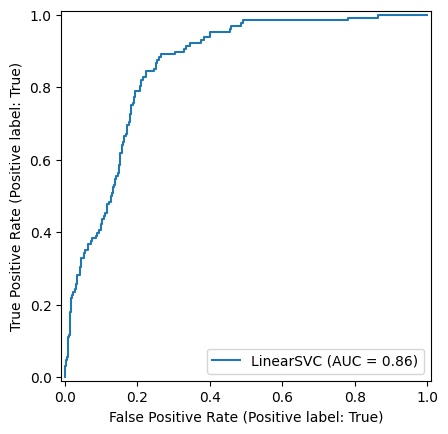


Confusion Matrix  

[[2292   45]
 [ 441   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      2733
        True       0.16      0.65      0.25       128

    accuracy                           0.83      2861
   macro avg       0.57      0.74      0.58      2861
weighted avg       0.94      0.83      0.88      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9551 
 Test Dataset Accuracy : 0.9126 
 ROC AUC Score         : 0.8426 



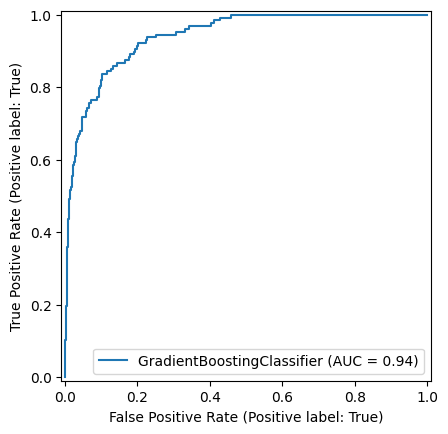


Confusion Matrix  

[[2513   30]
 [ 220   98]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2733
        True       0.31      0.77      0.44       128

    accuracy                           0.91      2861
   macro avg       0.65      0.84      0.70      2861
weighted avg       0.96      0.91      0.93      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7655 
 Test Dataset Accuracy : 0.8099 
 ROC AUC Score         : 0.7404 



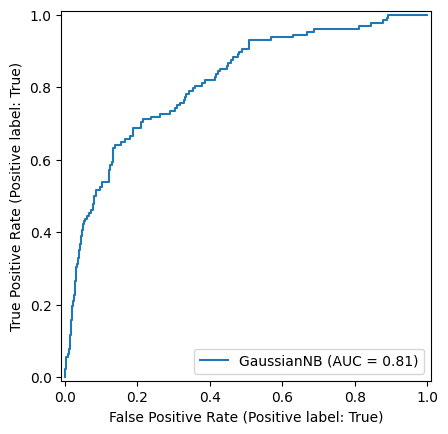


Confusion Matrix  

[[2232   43]
 [ 501   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.82      0.89      2733
        True       0.15      0.66      0.24       128

    accuracy                           0.81      2861
   macro avg       0.56      0.74      0.56      2861
weighted avg       0.94      0.81      0.86      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7149 
 Test Dataset Accuracy : 0.8469 
 ROC AUC Score         : 0.5885 



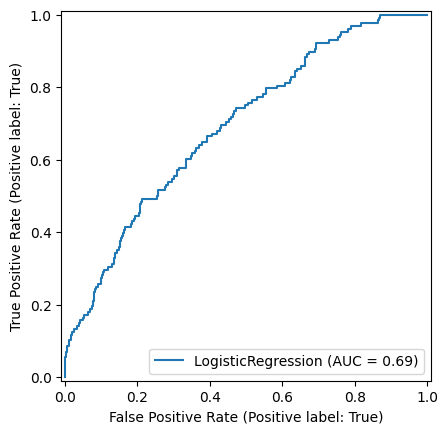


Confusion Matrix  

[[2384   89]
 [ 349   39]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.87      0.92      2733
        True       0.10      0.30      0.15       128

    accuracy                           0.85      2861
   macro avg       0.53      0.59      0.53      2861
weighted avg       0.93      0.85      0.88      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.8162 
 Test Dataset Accuracy : 0.8039 
 ROC AUC Score         : 0.6665 



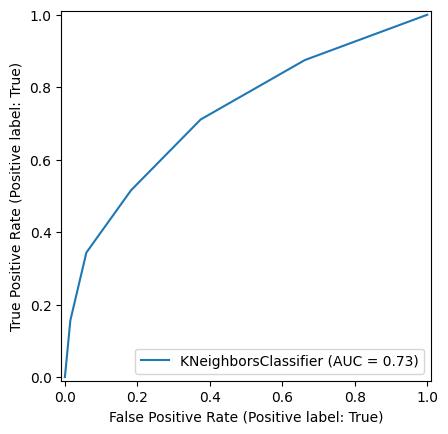


Confusion Matrix  

[[2234   62]
 [ 499   66]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2733
        True       0.12      0.52      0.19       128

    accuracy                           0.80      2861
   macro avg       0.54      0.67      0.54      2861
weighted avg       0.93      0.80      0.86      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9276 
 ROC AUC Score         : 0.8616 



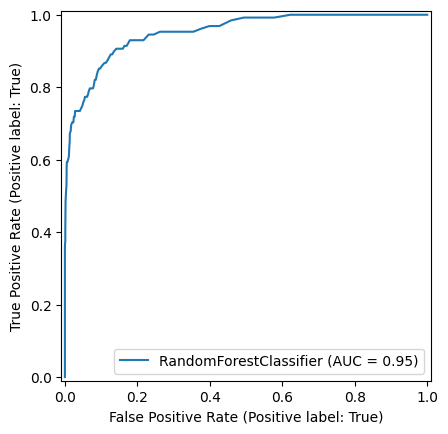


Confusion Matrix  

[[2553   27]
 [ 180  101]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.36      0.79      0.49       128

    accuracy                           0.93      2861
   macro avg       0.67      0.86      0.73      2861
weighted avg       0.96      0.93      0.94      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9249 
 ROC AUC Score         : 0.8713 



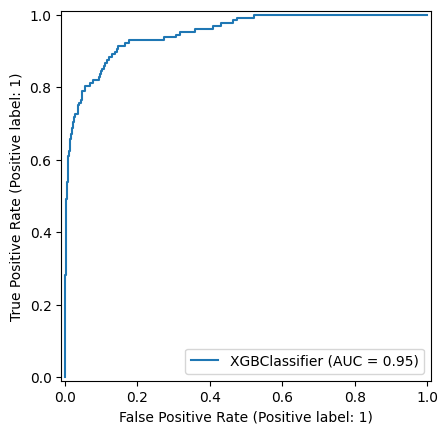


Confusion Matrix  

[[2542   24]
 [ 191  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.35      0.81      0.49       128

    accuracy                           0.92      2861
   macro avg       0.67      0.87      0.73      2861
weighted avg       0.96      0.92      0.94      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

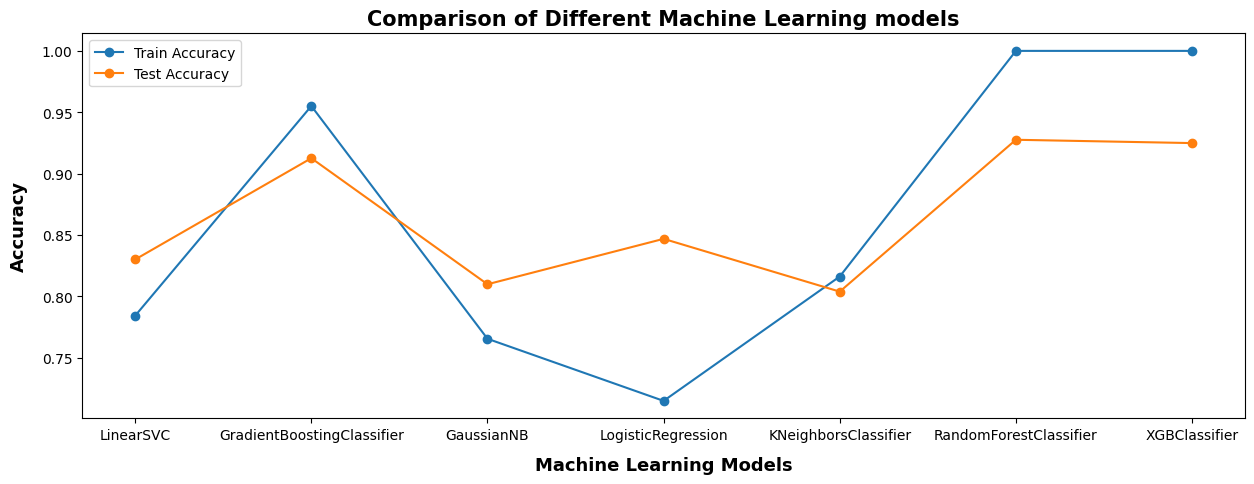

In [ ]:
## Combine - Random Under Sampling and SMOTE

from imblearn.combine import SMOTEENN
sample = SMOTEENN(sampling_strategy=0.5)

X_sm_both, y_sm_both = sample.fit_resample(X_train, y_train)


print(f'''Shape of X before SMOTE : {X.shape}
 Shape of X after SMOTE : {X_sm_both.shape}''')

print('\nBalance of positive and negative classes (%):')
print(np.sum(y_sm_both==1)/len(y_sm_both) * 100)
print(np.sum(y_sm_both==0)/len(y_sm_both) * 100)

# Convert to dataframe for this version of SMOTE (Python 3.7)
X_sm_both_df = pd.DataFrame(data=X_sm_both,columns=np.array(X.columns))
y_sm_both = np.array(y_sm_both).reshape(len(y_sm_both),)


for i, model in enumerate(pred_models_list):
    train_under,test_under,prec_under,rec_under,f1_sc_under= model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec_under
    Model_Pred['Recall'][i]         = rec_under
    Model_Pred['F1 Score'][i]       = f1_sc_under
    i = i+1

summary_graph()


After SMOTE Oversampling - Considering all features

---------------------------------------------------


Prediction for LinearSVC 

Train Dataset Accuracy : 0.7843 
 Test Dataset Accuracy : 0.8301 
 ROC AUC Score         : 0.7435 



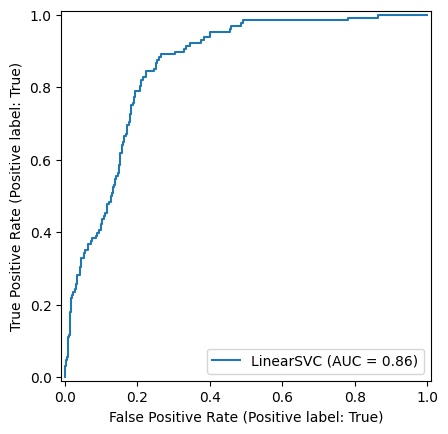


Confusion Matrix  

[[2292   45]
 [ 441   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      2733
        True       0.16      0.65      0.25       128

    accuracy                           0.83      2861
   macro avg       0.57      0.74      0.58      2861
weighted avg       0.94      0.83      0.88      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9567 
 Test Dataset Accuracy : 0.9161 
 ROC AUC Score         : 0.8444 



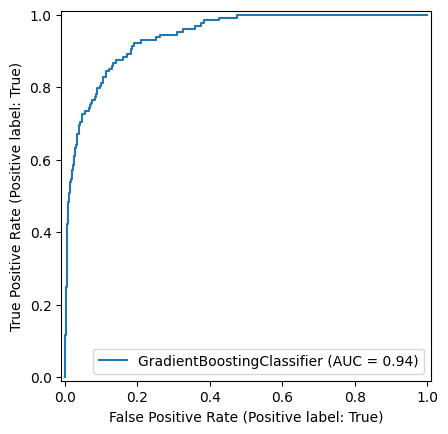


Confusion Matrix  

[[2523   30]
 [ 210   98]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2733
        True       0.32      0.77      0.45       128

    accuracy                           0.92      2861
   macro avg       0.65      0.84      0.70      2861
weighted avg       0.96      0.92      0.93      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7655 
 Test Dataset Accuracy : 0.8099 
 ROC AUC Score         : 0.7404 



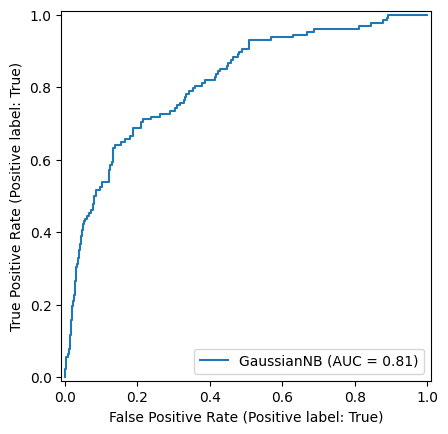


Confusion Matrix  

[[2232   43]
 [ 501   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.82      0.89      2733
        True       0.15      0.66      0.24       128

    accuracy                           0.81      2861
   macro avg       0.56      0.74      0.56      2861
weighted avg       0.94      0.81      0.86      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7149 
 Test Dataset Accuracy : 0.8469 
 ROC AUC Score         : 0.5885 



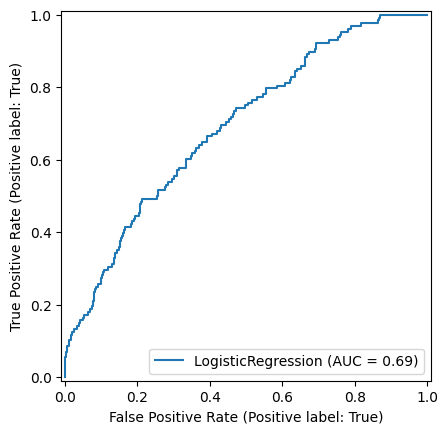


Confusion Matrix  

[[2384   89]
 [ 349   39]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.87      0.92      2733
        True       0.10      0.30      0.15       128

    accuracy                           0.85      2861
   macro avg       0.53      0.59      0.53      2861
weighted avg       0.93      0.85      0.88      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.8162 
 Test Dataset Accuracy : 0.8039 
 ROC AUC Score         : 0.6665 



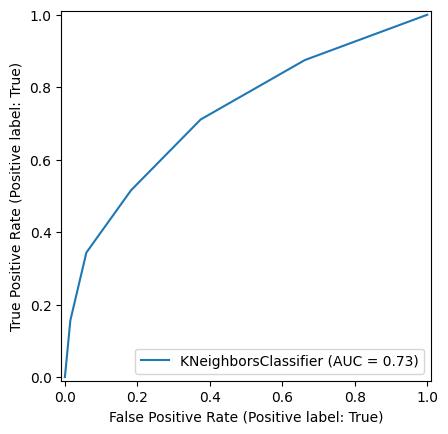


Confusion Matrix  

[[2234   62]
 [ 499   66]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2733
        True       0.12      0.52      0.19       128

    accuracy                           0.80      2861
   macro avg       0.54      0.67      0.54      2861
weighted avg       0.93      0.80      0.86      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9329 
 ROC AUC Score         : 0.8718 



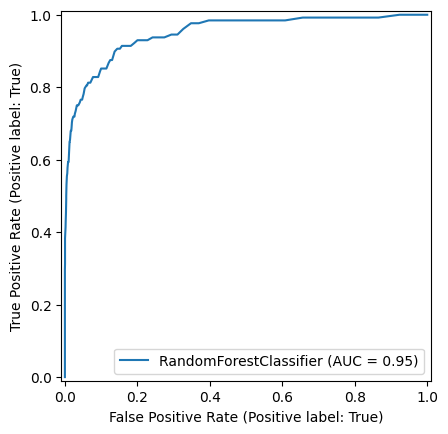


Confusion Matrix  

[[2566   25]
 [ 167  103]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      2733
        True       0.38      0.80      0.52       128

    accuracy                           0.93      2861
   macro avg       0.69      0.87      0.74      2861
weighted avg       0.96      0.93      0.94      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9249 
 ROC AUC Score         : 0.8713 



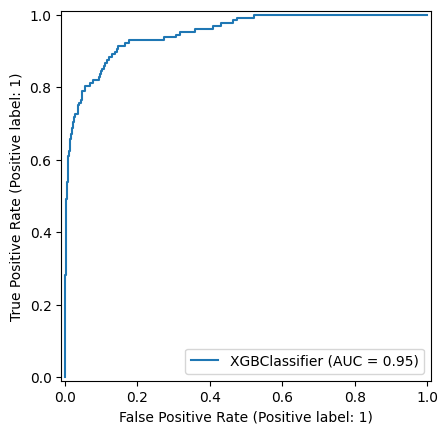


Confusion Matrix  

[[2542   24]
 [ 191  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.35      0.81      0.49       128

    accuracy                           0.92      2861
   macro avg       0.67      0.87      0.73      2861
weighted avg       0.96      0.92      0.94      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

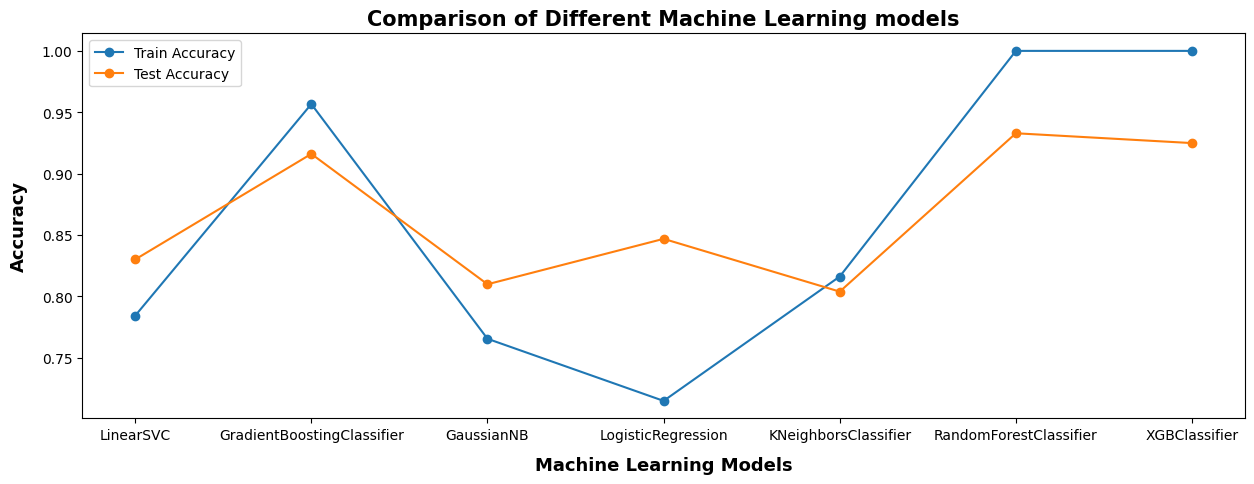

In [ ]:
print('\033[1m')
print("After SMOTE Oversampling - Considering all features")
print('\033[0m')
print("-" * 51)
print()
i = 0

for i, model in enumerate(pred_models_list):
    train_under,test_under,prec_under,rec_under,f1_sc_under= model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec_under
    Model_Pred['Recall'][i]         = rec_under
    Model_Pred['F1 Score'][i]       = f1_sc_under
    i = i+1

summary_graph()

# **Feature Importance**

As a next step, performed feature engineering using RandomForestClassifer() and XGBoostClassifier() method. Important features were extracted using the model.feature_importances_. The comparison was done by considering model performance while checking individual model’s important features and by combining both the RandomForest and XGBoostClassifier importance features. Finally, we combined the important features from both models because they performed better with a higher F1 measure.

<br>

Performed on the validation dataset for both Random Forest Classfier and Extra Trees Classifier

<br>


------------------------------------------------------------

Feature Importance using : RandomForestClassifier Classifier

------------------------------------------------------------

Confusion Matrix  

[[2729   79]
 [   4   49]]


    Recall Score : 0.9245
 Precision Score : 0.3828
  Accuracy Score : 0.9710
        F1 Score : 0.5414



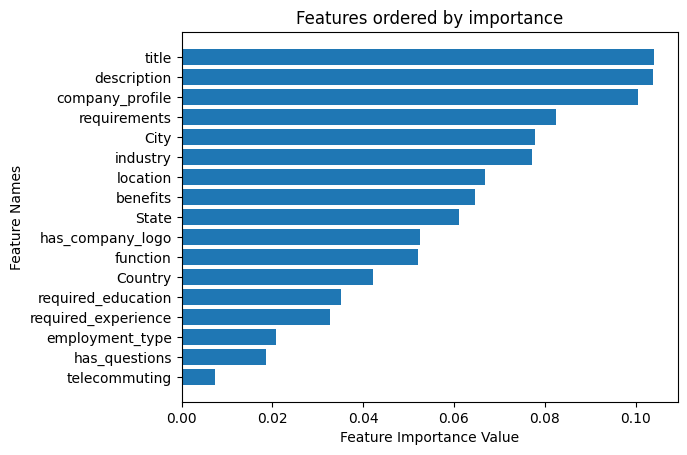


------------------------------------------------------------

Feature Importance using : XGBoost Classifier

------------------------------------------------------------

Confusion Matrix  

[[2715   53]
 [  18   75]]


    Recall Score : 0.8065
 Precision Score : 0.5859
  Accuracy Score : 0.9752
        F1 Score : 0.6787



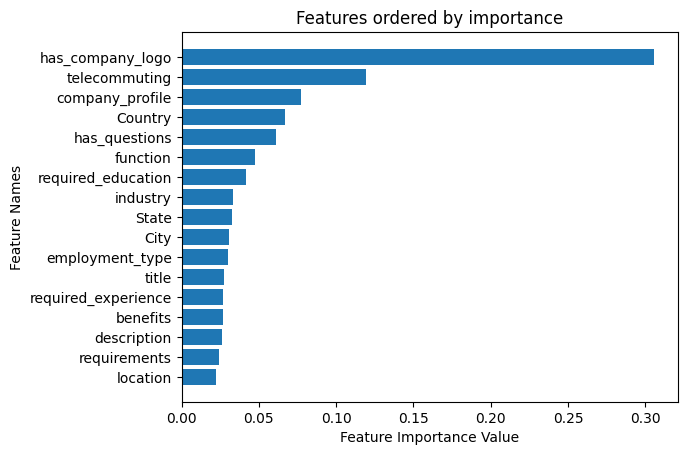

In [ ]:
# Function for retrieving the Feature Importance

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier


def get_feature_imp(X_train,y_train,X_test,y_test,model,feature_names,model_name):

    print('\033[1m')
    print("-" * 60)
    print(f"\nFeature Importance using : {model_name} Classifier")
    print('\033[0m')
    print("-" * 60)

    imp_feature=model.fit(X_train,y_train)
    y_pred=imp_feature.predict(X_test)

    print(f"\nConfusion Matrix  \n\n{confusion_matrix(y_pred,y_test)}\n\n")

    print(f"    Recall Score : {recall_score(y_pred,y_test):.4f}")
    print(f" Precision Score : {precision_score(y_pred,y_test):.4f}")
    print(f"  Accuracy Score : {accuracy_score(y_pred,y_test):.4f}")
    print(f"        F1 Score : {f1_score(y_pred,y_test):.4f}\n")




    d_imp = {'Feature Names': feature_names, 'Feature Importance': model.feature_importances_}

    importance = pd.DataFrame (d_imp)
    importance = importance.sort_values(by='Feature Importance')

    plt.barh("Feature Names", "Feature Importance", data = importance)
    plt.xlabel("Feature Importance Value")
    plt.ylabel("Feature Names")
    plt.title("Features ordered by importance")

    plt.show()

model_list = [("RandomForestClassifier", RandomForestClassifier()), ("XGBoost", XGBClassifier(), ("ExtraTreeClassifier",ExtraTreesClassifier()))]


feature_names =  np.array(X.columns)

# for model in model_list:
#     get_feature_imp(X_sm_df, y_sm.ravel(), X_test, y_test, model[1], feature_names,model[0])


for model in model_list:
    get_feature_imp(X_val, y_val, X_test, y_test, model[1], feature_names,model[0])

## **Performing Modeling & Evaluation with selected important features**

Checked model performance using only the important features that were selected

<br>

 ## **Selected important features using Random Forest Classifier**


Prediction for LinearSVC 

Train Dataset Accuracy : 0.7843 
 Test Dataset Accuracy : 0.8301 
 ROC AUC Score         : 0.7435 



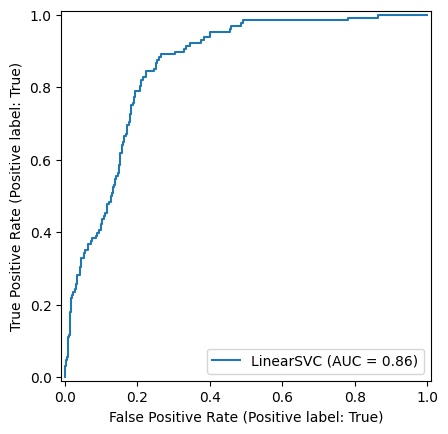


Confusion Matrix  

[[2292   45]
 [ 441   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      2733
        True       0.16      0.65      0.25       128

    accuracy                           0.83      2861
   macro avg       0.57      0.74      0.58      2861
weighted avg       0.94      0.83      0.88      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9575 
 Test Dataset Accuracy : 0.9119 
 ROC AUC Score         : 0.8385 



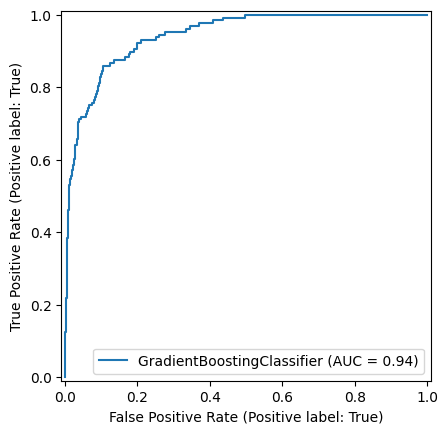


Confusion Matrix  

[[2512   31]
 [ 221   97]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2733
        True       0.31      0.76      0.43       128

    accuracy                           0.91      2861
   macro avg       0.65      0.84      0.69      2861
weighted avg       0.96      0.91      0.93      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7655 
 Test Dataset Accuracy : 0.8099 
 ROC AUC Score         : 0.7404 



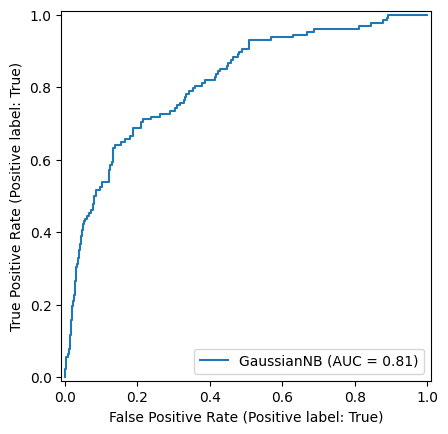


Confusion Matrix  

[[2232   43]
 [ 501   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.82      0.89      2733
        True       0.15      0.66      0.24       128

    accuracy                           0.81      2861
   macro avg       0.56      0.74      0.56      2861
weighted avg       0.94      0.81      0.86      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7149 
 Test Dataset Accuracy : 0.8469 
 ROC AUC Score         : 0.5885 



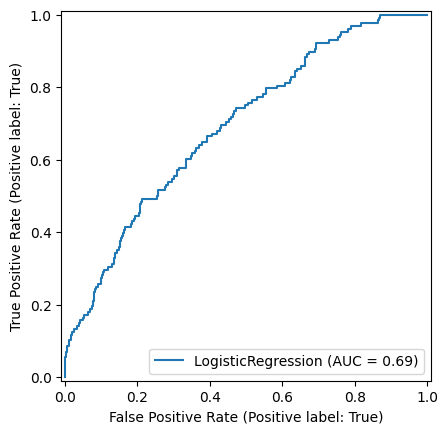


Confusion Matrix  

[[2384   89]
 [ 349   39]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.87      0.92      2733
        True       0.10      0.30      0.15       128

    accuracy                           0.85      2861
   macro avg       0.53      0.59      0.53      2861
weighted avg       0.93      0.85      0.88      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.8162 
 Test Dataset Accuracy : 0.8039 
 ROC AUC Score         : 0.6665 



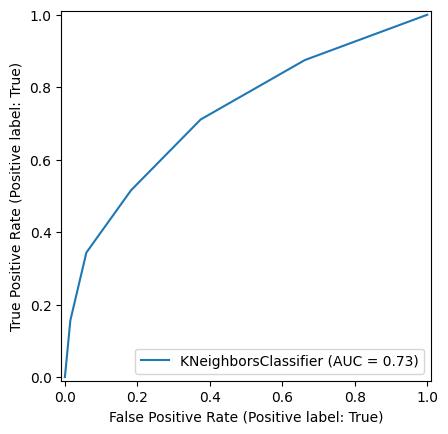


Confusion Matrix  

[[2234   62]
 [ 499   66]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2733
        True       0.12      0.52      0.19       128

    accuracy                           0.80      2861
   macro avg       0.54      0.67      0.54      2861
weighted avg       0.93      0.80      0.86      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9339 
 ROC AUC Score         : 0.8649 



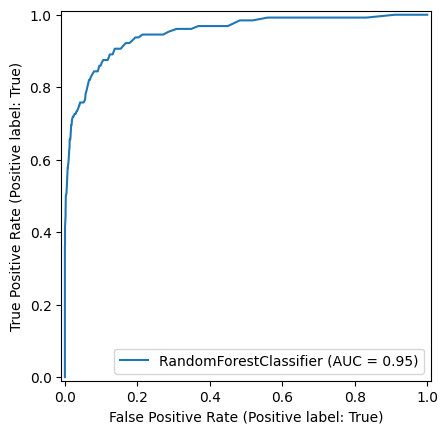


Confusion Matrix  

[[2571   27]
 [ 162  101]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      2733
        True       0.38      0.79      0.52       128

    accuracy                           0.93      2861
   macro avg       0.69      0.86      0.74      2861
weighted avg       0.96      0.93      0.94      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9249 
 ROC AUC Score         : 0.8713 



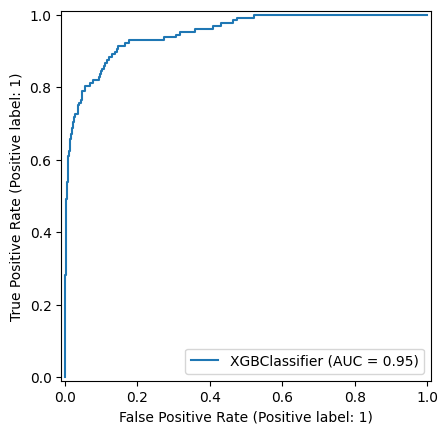


Confusion Matrix  

[[2542   24]
 [ 191  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.35      0.81      0.49       128

    accuracy                           0.92      2861
   macro avg       0.67      0.87      0.73      2861
weighted avg       0.96      0.92      0.94      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

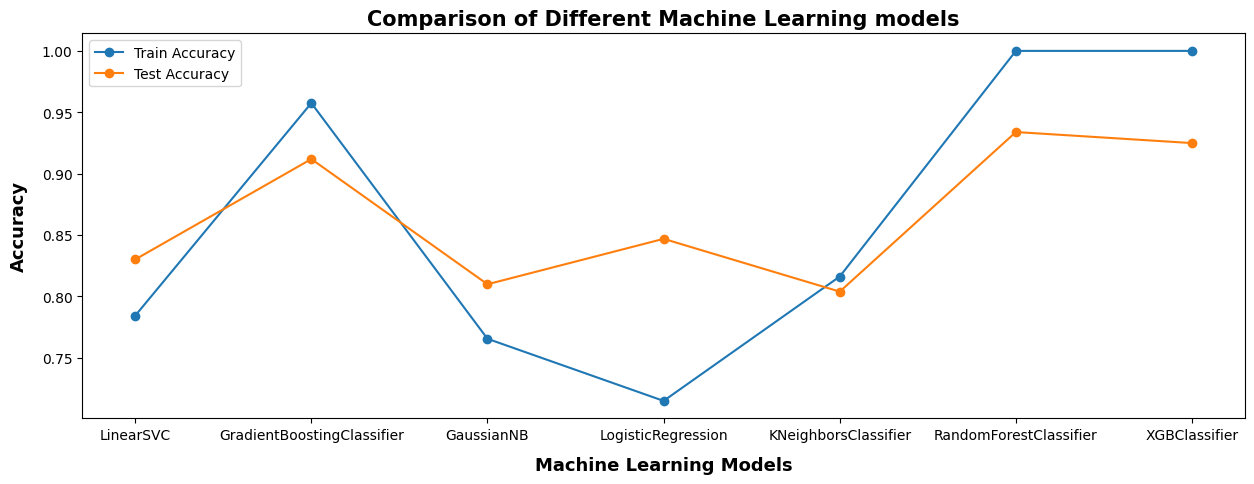

In [ ]:
# Important features using VALIDATION DATASET  & IMPORTANT FEATURES from RF

# RF

rf_imp_features = ['City','title','description','company_profile','industry'
,'location','requirements','State','has_company_logo']

xg_imp_features = ['has_company_logo' ,'function','has_questions','Country',
                   'company_profile','City','description','industry']




for i, model in enumerate(pred_models_list):
    train_under,test_under,prec_under,rec_under,f1_sc_under= model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec_under
    Model_Pred['Recall'][i]         = rec_under
    Model_Pred['F1 Score'][i]       = f1_sc_under
    i = i+1

summary_graph()

## **Selected important features using XGBoost Classifier**


Prediction for LinearSVC 

Train Dataset Accuracy : 0.7843 
 Test Dataset Accuracy : 0.8301 
 ROC AUC Score         : 0.7435 



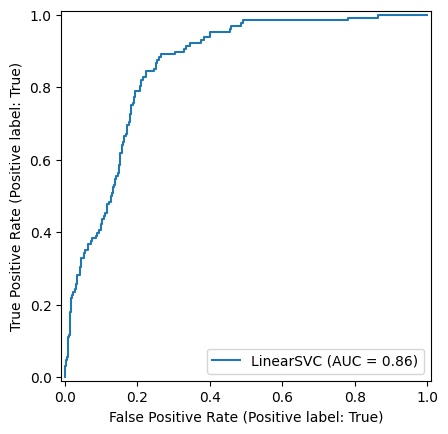


Confusion Matrix  

[[2292   45]
 [ 441   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      2733
        True       0.16      0.65      0.25       128

    accuracy                           0.83      2861
   macro avg       0.57      0.74      0.58      2861
weighted avg       0.94      0.83      0.88      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9575 
 Test Dataset Accuracy : 0.9116 
 ROC AUC Score         : 0.8383 



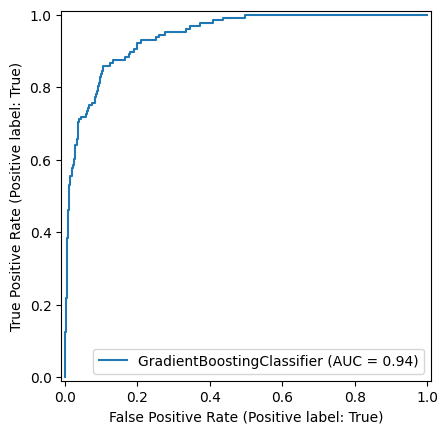


Confusion Matrix  

[[2511   31]
 [ 222   97]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2733
        True       0.30      0.76      0.43       128

    accuracy                           0.91      2861
   macro avg       0.65      0.84      0.69      2861
weighted avg       0.96      0.91      0.93      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7655 
 Test Dataset Accuracy : 0.8099 
 ROC AUC Score         : 0.7404 



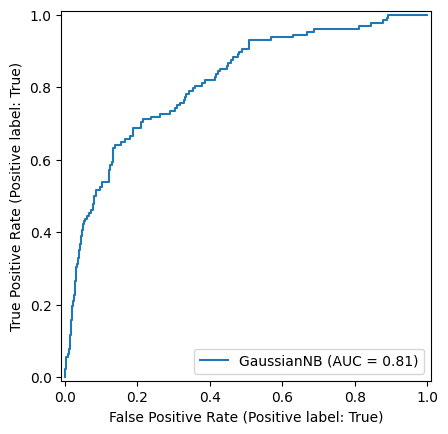


Confusion Matrix  

[[2232   43]
 [ 501   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.82      0.89      2733
        True       0.15      0.66      0.24       128

    accuracy                           0.81      2861
   macro avg       0.56      0.74      0.56      2861
weighted avg       0.94      0.81      0.86      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7149 
 Test Dataset Accuracy : 0.8469 
 ROC AUC Score         : 0.5885 



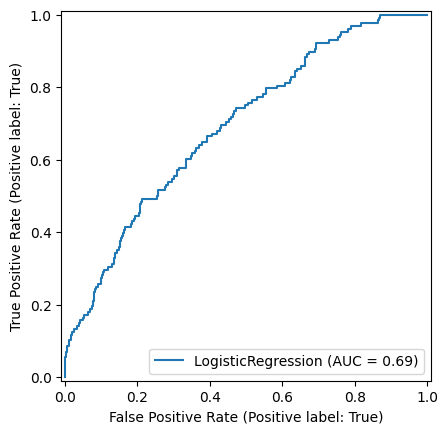


Confusion Matrix  

[[2384   89]
 [ 349   39]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.87      0.92      2733
        True       0.10      0.30      0.15       128

    accuracy                           0.85      2861
   macro avg       0.53      0.59      0.53      2861
weighted avg       0.93      0.85      0.88      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.8162 
 Test Dataset Accuracy : 0.8039 
 ROC AUC Score         : 0.6665 



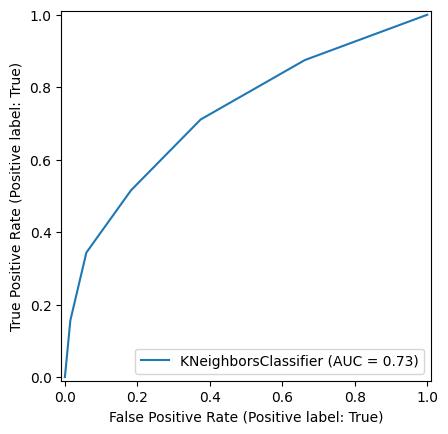


Confusion Matrix  

[[2234   62]
 [ 499   66]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2733
        True       0.12      0.52      0.19       128

    accuracy                           0.80      2861
   macro avg       0.54      0.67      0.54      2861
weighted avg       0.93      0.80      0.86      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9346 
 ROC AUC Score         : 0.8764 



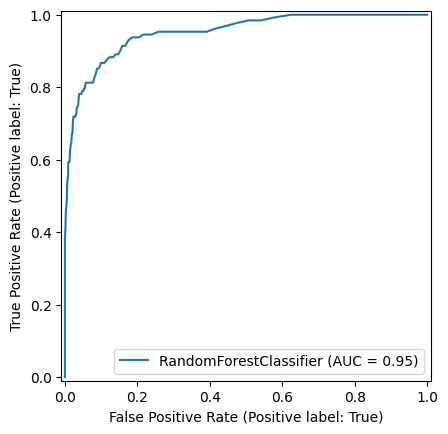


Confusion Matrix  

[[2570   24]
 [ 163  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      2733
        True       0.39      0.81      0.53       128

    accuracy                           0.93      2861
   macro avg       0.69      0.88      0.75      2861
weighted avg       0.96      0.93      0.95      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9249 
 ROC AUC Score         : 0.8713 



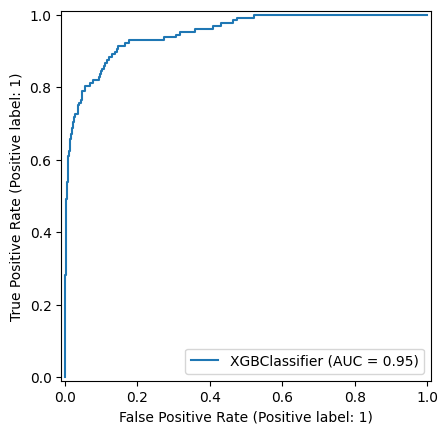


Confusion Matrix  

[[2542   24]
 [ 191  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.35      0.81      0.49       128

    accuracy                           0.92      2861
   macro avg       0.67      0.87      0.73      2861
weighted avg       0.96      0.92      0.94      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

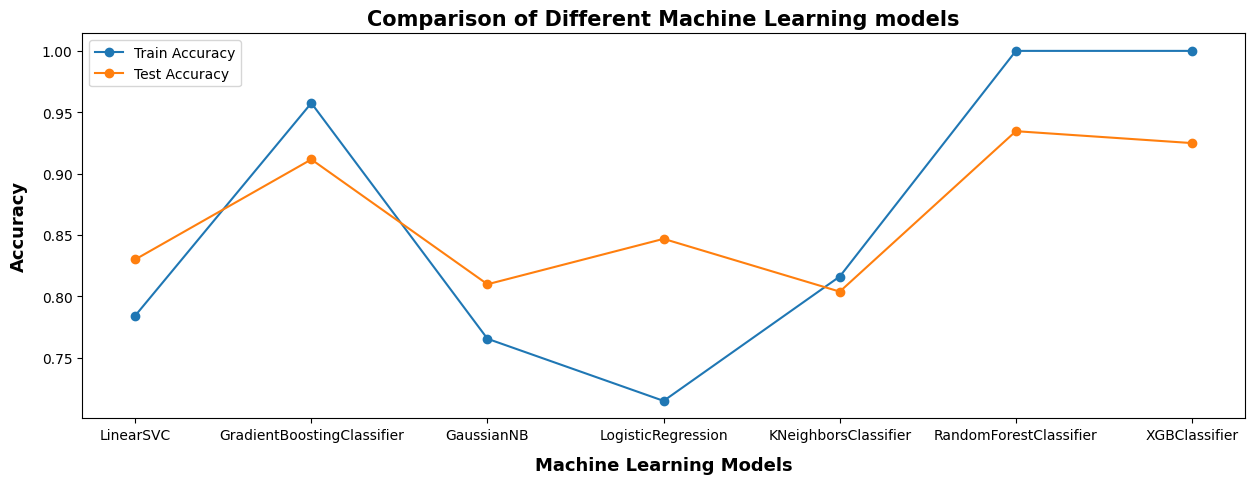

In [ ]:
# Important features using VALIDATION DATASET  & IMPORTANT FEATURES from XG


for i, model in enumerate(pred_models_list):
    train_under,test_under,prec_under,rec_under,f1_sc_under= model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec_under
    Model_Pred['Recall'][i]         = rec_under
    Model_Pred['F1 Score'][i]       = f1_sc_under
    i = i+1

summary_graph()

## **Selected important features combining both Random Forest and XGBoost Classifier - Intersection of features**


Prediction for LinearSVC 

Train Dataset Accuracy : 0.7843 
 Test Dataset Accuracy : 0.8301 
 ROC AUC Score         : 0.7435 



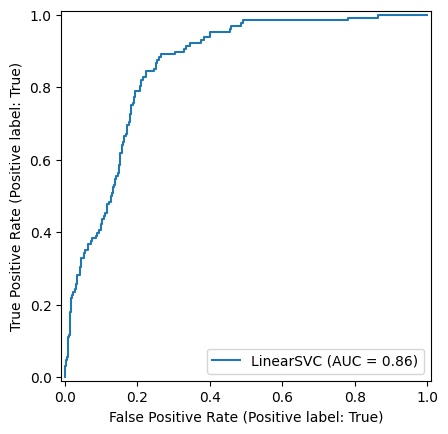


Confusion Matrix  

[[2292   45]
 [ 441   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      2733
        True       0.16      0.65      0.25       128

    accuracy                           0.83      2861
   macro avg       0.57      0.74      0.58      2861
weighted avg       0.94      0.83      0.88      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9575 
 Test Dataset Accuracy : 0.9116 
 ROC AUC Score         : 0.8383 



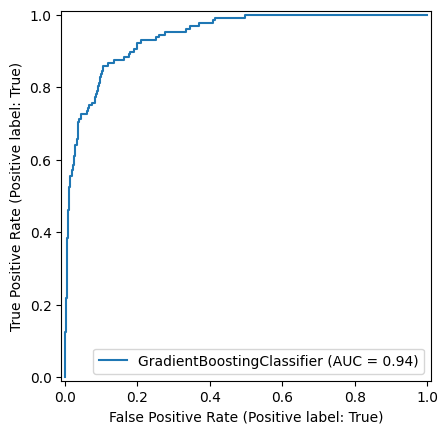


Confusion Matrix  

[[2511   31]
 [ 222   97]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2733
        True       0.30      0.76      0.43       128

    accuracy                           0.91      2861
   macro avg       0.65      0.84      0.69      2861
weighted avg       0.96      0.91      0.93      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7655 
 Test Dataset Accuracy : 0.8099 
 ROC AUC Score         : 0.7404 



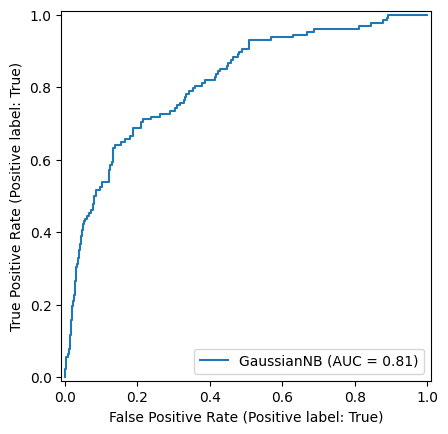


Confusion Matrix  

[[2232   43]
 [ 501   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.82      0.89      2733
        True       0.15      0.66      0.24       128

    accuracy                           0.81      2861
   macro avg       0.56      0.74      0.56      2861
weighted avg       0.94      0.81      0.86      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7149 
 Test Dataset Accuracy : 0.8469 
 ROC AUC Score         : 0.5885 



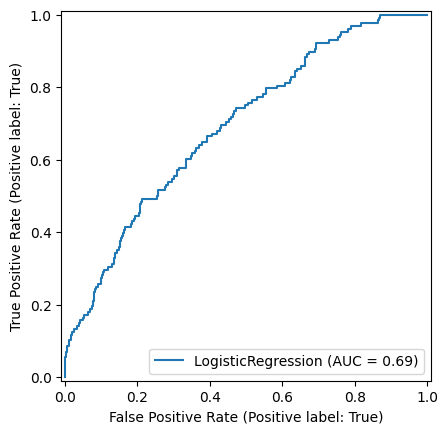


Confusion Matrix  

[[2384   89]
 [ 349   39]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.87      0.92      2733
        True       0.10      0.30      0.15       128

    accuracy                           0.85      2861
   macro avg       0.53      0.59      0.53      2861
weighted avg       0.93      0.85      0.88      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.8162 
 Test Dataset Accuracy : 0.8039 
 ROC AUC Score         : 0.6665 



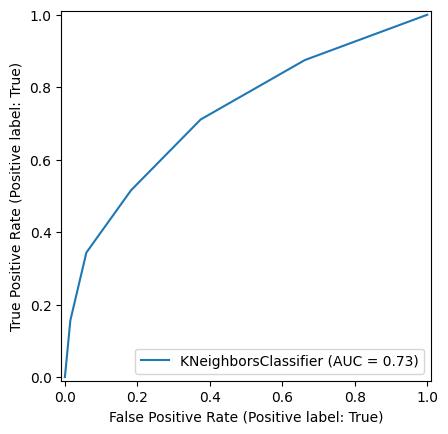


Confusion Matrix  

[[2234   62]
 [ 499   66]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2733
        True       0.12      0.52      0.19       128

    accuracy                           0.80      2861
   macro avg       0.54      0.67      0.54      2861
weighted avg       0.93      0.80      0.86      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9332 
 ROC AUC Score         : 0.8608 



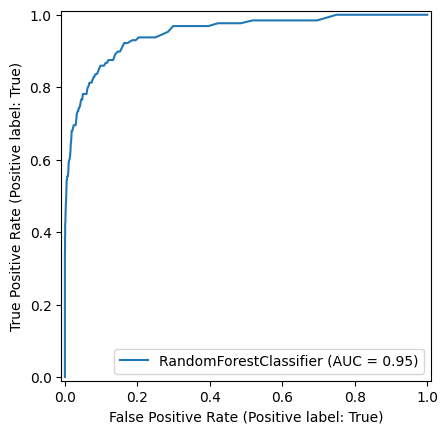


Confusion Matrix  

[[2570   28]
 [ 163  100]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      2733
        True       0.38      0.78      0.51       128

    accuracy                           0.93      2861
   macro avg       0.68      0.86      0.74      2861
weighted avg       0.96      0.93      0.94      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9249 
 ROC AUC Score         : 0.8713 



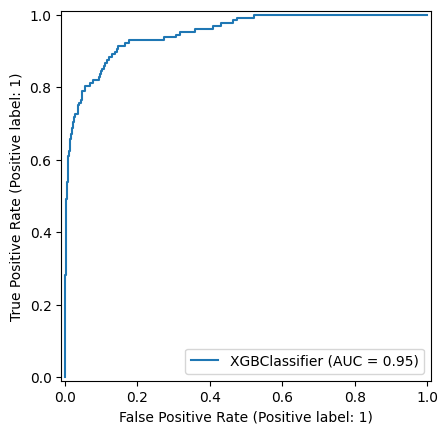


Confusion Matrix  

[[2542   24]
 [ 191  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.35      0.81      0.49       128

    accuracy                           0.92      2861
   macro avg       0.67      0.87      0.73      2861
weighted avg       0.96      0.92      0.94      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

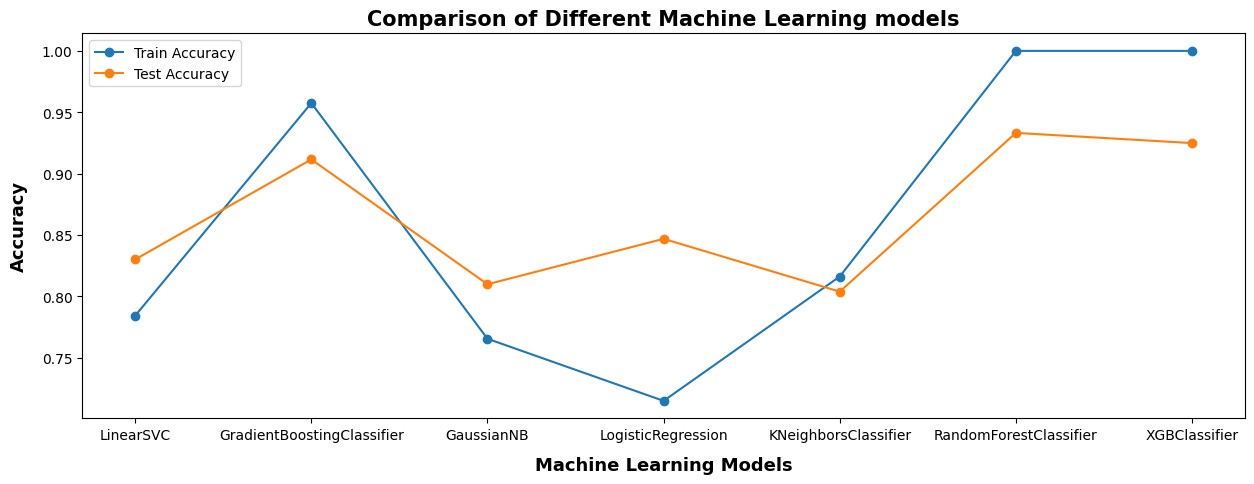

In [ ]:
# Important features using VALIDATION DATASET  & COMBINED FEATURES from XG and RF

combo_imp_features = ['City','title','description','company_profile','industry'
,'location','requirements','State','has_company_logo','function','has_questions','Country']


for i, model in enumerate(pred_models_list):
    train_under,test_under,prec_under,rec_under,f1_sc_under= model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec_under
    Model_Pred['Recall'][i]         = rec_under
    Model_Pred['F1 Score'][i]       = f1_sc_under
    i = i+1

summary_graph()

## **Selected important features combining both Random Forest and XGBoost Classifier - UNION of features**

In [ ]:
# From XGBoost Feature Importance
# imp_features = ['has_company_logo','has_questions'
#                 ,'company_profile','required_education','function','Country'
#                 ,'required_experience']


# From Random Forest Feature Importance
# imp_features = ['has_company_logo' ,'company_profile','required_education','function','has_questions','requirements'
#                 ,'industry']

# Intersection: XGBoost and Random Forest Feature Importance
# imp_features = ['has_company_logo' ,'company_profile','required_education','function','has_questions']

# Union: XGBoost and Random Forest Feature Importance
imp_features = ['has_company_logo' ,'company_profile','required_education','function','has_questions'
                ,'Country', 'required_experience','requirements','industry']


X_imp = Fraud_Job_df[imp_features]
y_imp = Fraud_Job_df[['fraudulent']]

## **Sampling with only selected features and checking performance**

In [ ]:
# Sample data again with selecting only IMPORTANT FEATURES
from sklearn.model_selection import train_test_split


X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_imp, y_imp, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train_imp.value_counts(normalize=True)[1] * 100, 2)}
\n% Positive class in Test  = {np.round(y_test_imp.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 5.03

% Positive class in Test  = 4.28



After Selecting Important Features

---------------------------------------------------


Prediction for LinearSVC 

Train Dataset Accuracy : 0.7843 
 Test Dataset Accuracy : 0.8301 
 ROC AUC Score         : 0.7435 



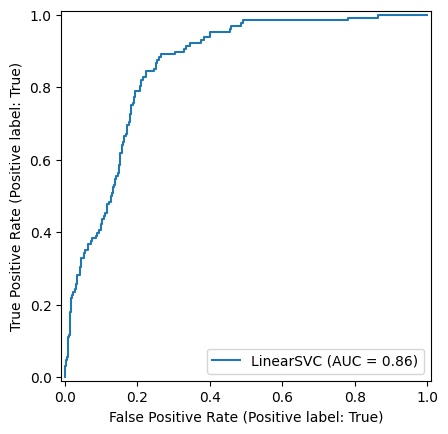


Confusion Matrix  

[[2292   45]
 [ 441   83]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.84      0.90      2733
        True       0.16      0.65      0.25       128

    accuracy                           0.83      2861
   macro avg       0.57      0.74      0.58      2861
weighted avg       0.94      0.83      0.88      2861



Prediction for GradientBoostingClassifier 

Train Dataset Accuracy : 0.9592 
 Test Dataset Accuracy : 0.9144 
 ROC AUC Score         : 0.8435 



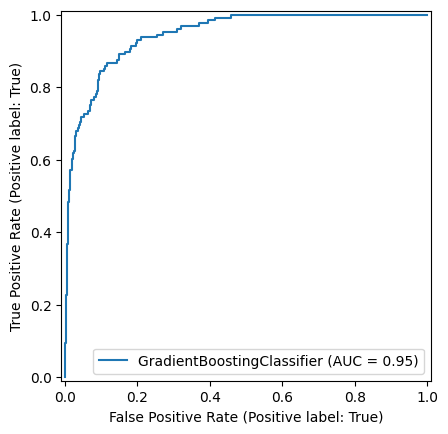


Confusion Matrix  

[[2518   30]
 [ 215   98]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2733
        True       0.31      0.77      0.44       128

    accuracy                           0.91      2861
   macro avg       0.65      0.84      0.70      2861
weighted avg       0.96      0.91      0.93      2861



Prediction for GaussianNB 

Train Dataset Accuracy : 0.7655 
 Test Dataset Accuracy : 0.8099 
 ROC AUC Score         : 0.7404 



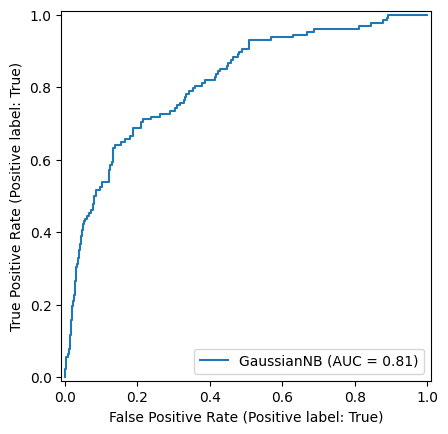


Confusion Matrix  

[[2232   43]
 [ 501   85]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      0.82      0.89      2733
        True       0.15      0.66      0.24       128

    accuracy                           0.81      2861
   macro avg       0.56      0.74      0.56      2861
weighted avg       0.94      0.81      0.86      2861



Prediction for LogisticRegression 

Train Dataset Accuracy : 0.7149 
 Test Dataset Accuracy : 0.8469 
 ROC AUC Score         : 0.5885 



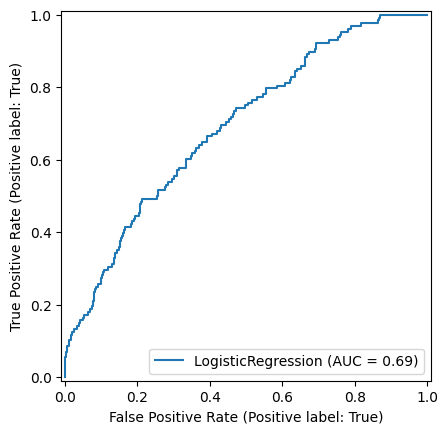


Confusion Matrix  

[[2384   89]
 [ 349   39]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.96      0.87      0.92      2733
        True       0.10      0.30      0.15       128

    accuracy                           0.85      2861
   macro avg       0.53      0.59      0.53      2861
weighted avg       0.93      0.85      0.88      2861



Prediction for KNeighborsClassifier 

Train Dataset Accuracy : 0.8162 
 Test Dataset Accuracy : 0.8039 
 ROC AUC Score         : 0.6665 



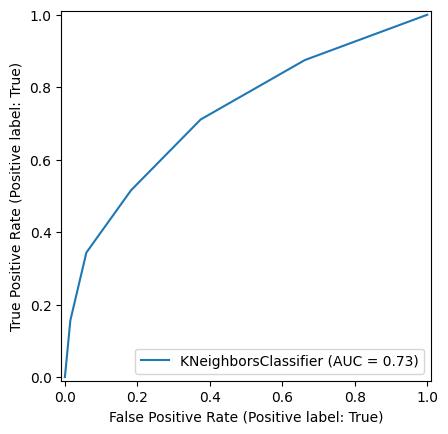


Confusion Matrix  

[[2234   62]
 [ 499   66]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      0.82      0.89      2733
        True       0.12      0.52      0.19       128

    accuracy                           0.80      2861
   macro avg       0.54      0.67      0.54      2861
weighted avg       0.93      0.80      0.86      2861



Prediction for RandomForestClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9325 
 ROC AUC Score         : 0.8642 



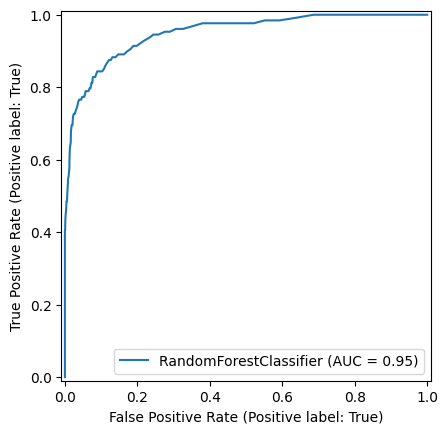


Confusion Matrix  

[[2567   27]
 [ 166  101]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.94      0.96      2733
        True       0.38      0.79      0.51       128

    accuracy                           0.93      2861
   macro avg       0.68      0.86      0.74      2861
weighted avg       0.96      0.93      0.94      2861



Prediction for XGBClassifier 

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9249 
 ROC AUC Score         : 0.8713 



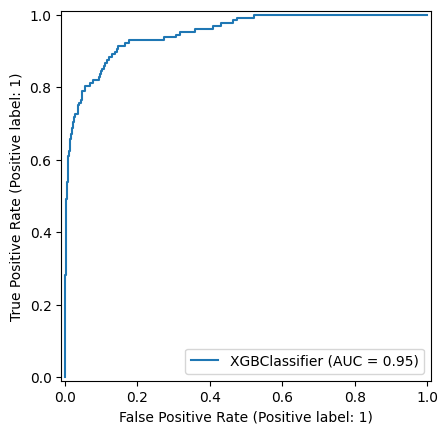


Confusion Matrix  

[[2542   24]
 [ 191  104]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.99      0.93      0.96      2733
        True       0.35      0.81      0.49       128

    accuracy                           0.92      2861
   macro avg       0.67      0.87      0.73      2861
weighted avg       0.96      0.92      0.94      2861




--------------------------------------------------------------------------------------------------------------
                                                Model Prediction Summary
--------------------------------------------------------------------------------------------------------------

+----+----------------------------+------------------+-----------------+-------------+----------+------------+
|    | Model Names                |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |
|----+----------------------------+------------------+-----------------+--

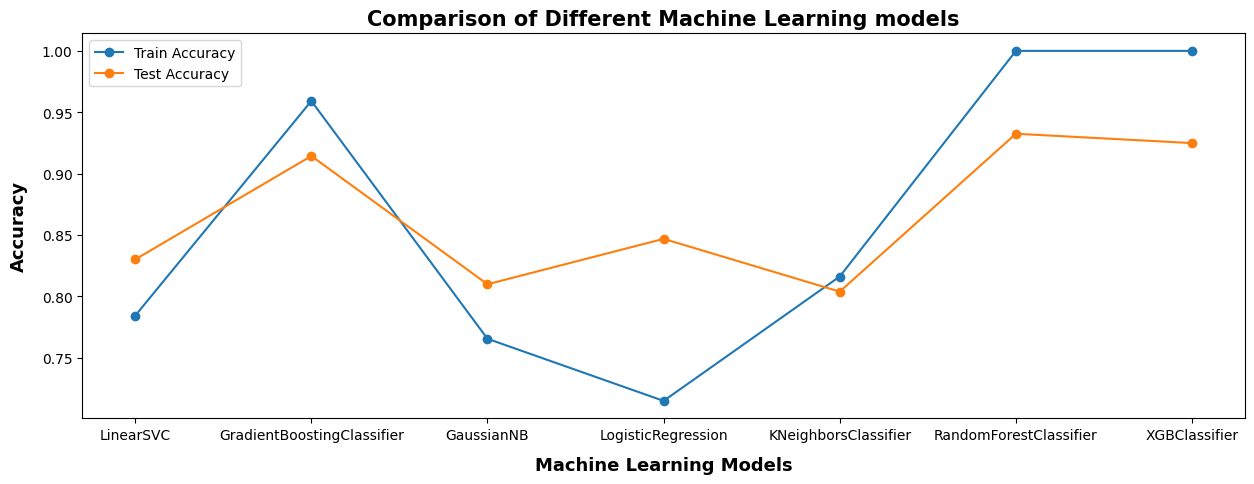

In [ ]:
print('\033[1m')
print("After Selecting Important Features")
print('\033[0m')
print("-" * 51)
print()
i = 0

for i, model in enumerate(pred_models_list):
    train_under,test_under,prec_under,rec_under,f1_sc_under= model_prediction(model[1],X_under_df, y_under,X_test,y_test,model[0])
    Model_Pred['Train Accuracy'][i] = train_under
    Model_Pred['Test Accuracy'][i]  = test_under
    Model_Pred['Precision'] [i]     = prec_under
    Model_Pred['Recall'][i]         = rec_under
    Model_Pred['F1 Score'][i]       = f1_sc_under
    i = i+1

summary_graph()

## **Hyperparameter Optimization**

Random Forest model has performed the best until now.


The next challenge is to improve the performance by finding the most optimum hyperparameters that will give the best output. This is called Hyperparameter optimization.
The validation dataset was used along with nested k-fold validation to check for the optimum hyperparameters. Below are the hyperparameters that were tuned for the RF model.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## **K-fold Cross validation; k =5 ; to check for optimal hyperparameters**

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid
                               , n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_val, y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

## **Best parameters are found for k=5!**

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

#### **Evaluate model with best hyperparameters + all features**

Evaluate the model with the best parameters chosen - using all features


Prediction for Tuned model

Train Dataset Accuracy : 0.9733 
 Test Dataset Accuracy : 0.9703 
 ROC AUC Score         : 0.694 



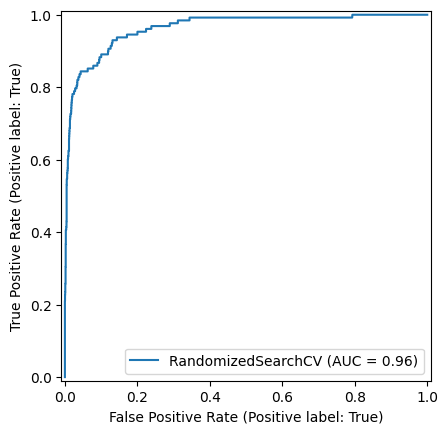


Confusion Matrix  

[[2726   78]
 [   7   50]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      2733
        True       0.88      0.39      0.54       128

    accuracy                           0.97      2861
   macro avg       0.92      0.69      0.76      2861
weighted avg       0.97      0.97      0.96      2861




In [ ]:
from sklearn.metrics import RocCurveDisplay

print('\033[1m')
print(f"Prediction for Tuned model")
print('\033[0m')

train_fit = rf_random.predict(X_train)
test_fit  = rf_random.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.RocCurveDisplay.from_estimator(rf_random, X_test, y_test)
plt.show()

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

## **K-fold Cross validation; k =10 ; to check for optimal hyperparameters**

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_imp = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random_imp = RandomizedSearchCV(estimator = rf_imp, param_distributions = random_grid
                               , n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_imp.fit(X_val[combo_imp_features], y_val)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

## **Best parameters are found for k=10!**

In [ ]:
rf_random_imp.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

## **Evaluate model with best hyperparameters + all features**

Evaluate the model with the best parameters chosen - using all features


Prediction for Tuned model WITH IMPORTANT FEATURES ONLY

Train Dataset Accuracy : 0.9704 
 Test Dataset Accuracy : 0.9671 
 ROC AUC Score         : 0.6552 



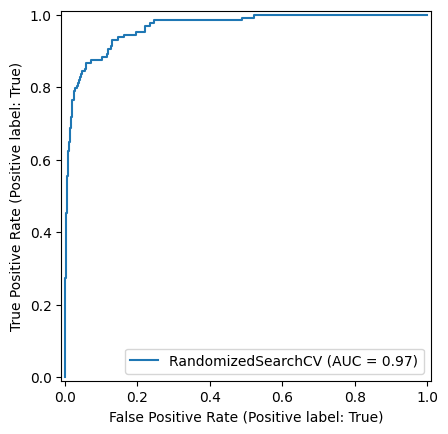


Confusion Matrix  

[[2727   88]
 [   6   40]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      2733
        True       0.87      0.31      0.46       128

    accuracy                           0.97      2861
   macro avg       0.92      0.66      0.72      2861
weighted avg       0.96      0.97      0.96      2861




In [ ]:
from sklearn.metrics import RocCurveDisplay
print('\033[1m')
print(f"Prediction for Tuned model WITH IMPORTANT FEATURES ONLY")
print('\033[0m')

train_fit = rf_random_imp.predict(X_train[combo_imp_features])
test_fit  = rf_random_imp.predict(X_test[combo_imp_features])

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.RocCurveDisplay.from_estimator(rf_random_imp, X_test[combo_imp_features], y_test)
plt.show()

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

Predict with all features on the tuned model


Prediction for Tuned model WITH ALL FEATURES

Train Dataset Accuracy : 0.9733 
 Test Dataset Accuracy : 0.9703 
 ROC AUC Score         : 0.694 



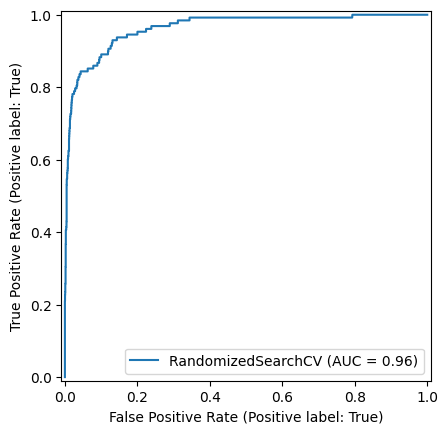


Confusion Matrix  

[[2726   78]
 [   7   50]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.97      1.00      0.98      2733
        True       0.88      0.39      0.54       128

    accuracy                           0.97      2861
   macro avg       0.92      0.69      0.76      2861
weighted avg       0.97      0.97      0.96      2861




In [ ]:
from sklearn.metrics import RocCurveDisplay

# rf_random.predict(X_test,y_test)

# y_pred=rf_random.predict(X_test)

# model_fitted = model.fit(X_train, y_array)
print('\033[1m')
print(f"Prediction for Tuned model WITH ALL FEATURES")
print('\033[0m')

train_fit = rf_random.predict(X_train)
test_fit  = rf_random.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.RocCurveDisplay.from_estimator(rf_random, X_test, y_test)
plt.show()

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

## **Final Model Evaluation**

Model evaluation has been done using optimized hyperparameters


## **Evaluate final model with TUNED hyperparameters + ALL features**


Prediction for FINAL Tuned model WITH ALL FEATURES & TUNED PARAMETER

Train Dataset Accuracy : 0.999 
 Test Dataset Accuracy : 0.978 
 ROC AUC Score         : 0.7688 



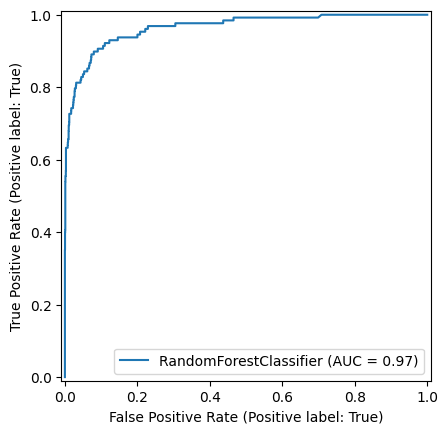


Confusion Matrix  

[[2729   59]
 [   4   69]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2733
        True       0.95      0.54      0.69       128

    accuracy                           0.98      2861
   macro avg       0.96      0.77      0.84      2861
weighted avg       0.98      0.98      0.98      2861




In [ ]:
from sklearn.metrics import RocCurveDisplay
# 'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 2000

rf_tuned = RandomForestClassifier(
    bootstrap=False,
    max_depth=80,
    max_features='sqrt',  # ← FIXED HERE
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=1000
)


rf_tuned = RandomForestClassifier(
    bootstrap=False,
    max_depth=80,
    max_features='sqrt',  # ← FIXED HERE
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=1000
)



rf_tuned.fit(X_train, y_train)

# model_fitted = model.fit(X_train, y_array)
print('\033[1m')
print(f"Prediction for FINAL Tuned model WITH ALL FEATURES & TUNED PARAMETER")
print('\033[0m')

train_fit = rf_tuned.predict(X_train)
test_fit  = rf_tuned.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.RocCurveDisplay.from_estimator(rf_tuned, X_test, y_test)
plt.show()

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

## **Evaluate final model with TUNED hyperparameters + IMPORTANT features**


Prediction for FINAL Tuned model WITH ALL FEATURES & TUNED PARAMETER

Train Dataset Accuracy : 0.9991 
 Test Dataset Accuracy : 0.9787 
 ROC AUC Score         : 0.7729 



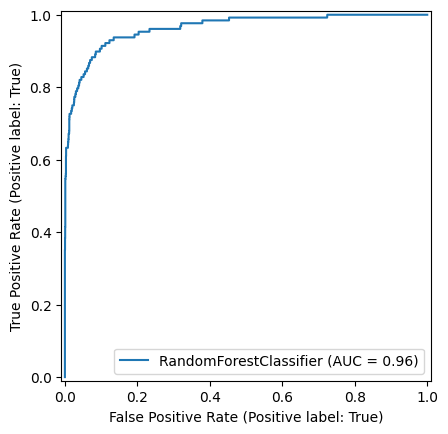


Confusion Matrix  

[[2730   58]
 [   3   70]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2733
        True       0.96      0.55      0.70       128

    accuracy                           0.98      2861
   macro avg       0.97      0.77      0.84      2861
weighted avg       0.98      0.98      0.98      2861




In [ ]:
from sklearn.metrics import RocCurveDisplay
# 'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 2000

rf_tuned = RandomForestClassifier(
    bootstrap=False,
    max_depth=80,
    max_features='sqrt',  # ← FIXED HERE
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=1000
)



rf_tuned.fit(X_train, y_train)

# model_fitted = model.fit(X_train, y_array)
print('\033[1m')
print(f"Prediction for FINAL Tuned model WITH ALL FEATURES & TUNED PARAMETER")
print('\033[0m')

train_fit = rf_tuned.predict(X_train)
test_fit  = rf_tuned.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.RocCurveDisplay.from_estimator(rf_tuned, X_test, y_test)
plt.show()

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()


Prediction for FINAL Tuned model WITH IMPORTANT FEATURES & TUNED PARAMETER

Train Dataset Accuracy : 1.0 
 Test Dataset Accuracy : 0.9776 
 ROC AUC Score         : 0.7649 



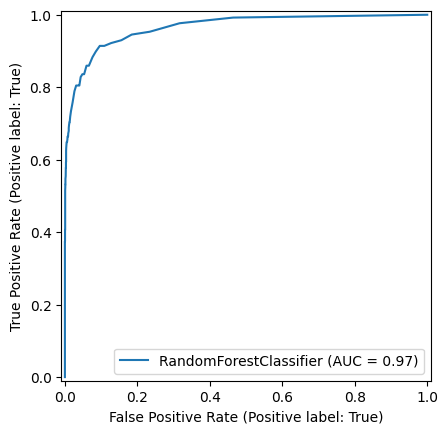


Confusion Matrix  

[[2729   60]
 [   4   68]]



 Classification Report : 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2733
        True       0.94      0.53      0.68       128

    accuracy                           0.98      2861
   macro avg       0.96      0.76      0.83      2861
weighted avg       0.98      0.98      0.97      2861




In [ ]:
from sklearn.metrics import RocCurveDisplay
# 'bootstrap': False,
#  'max_depth': 50,
#  'max_features': 'auto',
#  'min_samples_leaf': 2,
#  'min_samples_split': 2,
#  'n_estimators': 2000

rf_default = RandomForestClassifier()


rf_default.fit(X_train, y_train)

# model_fitted = model.fit(X_train, y_array)
print('\033[1m')
print(f"Prediction for FINAL Tuned model WITH IMPORTANT FEATURES & TUNED PARAMETER")
print('\033[0m')

train_fit = rf_default.predict(X_train)
test_fit  = rf_default.predict(X_test)

train_accuracy = round(accuracy_score(train_fit,y_train),4)
test_accuracy  = round(accuracy_score(test_fit,y_test),4)
precision      = round(precision_score(test_fit,y_test),4)
recall         = round(recall_score(test_fit,y_test),4)
f1             = round(f1_score(test_fit,y_test),4)

roc_auc        = round(roc_auc_score(y_test,test_fit),4)

print(f"Train Dataset Accuracy : {train_accuracy} ")
print(f" Test Dataset Accuracy : {test_accuracy} ")
print(f" ROC AUC Score         : {roc_auc} \n")

metrics.RocCurveDisplay.from_estimator(rf_default, X_test, y_test)
plt.show()

print(f"\nConfusion Matrix  \n\n{confusion_matrix(test_fit,y_test)}\n\n")

print(f"\n Classification Report : \n")
print(classification_report(y_test,test_fit))


print()

## **Conclusion and Summary**

> Random Forest Classifier performed the best with a F1 score of 0.76 With All Features & Tuned Parameter

> Random Forest Classifier performed the best with a F1 score of 0.98 while using important features selected and tuned Hyper parameters

So we are using the Random Forest Classifier using selected important features to classify the data for our stream lit app.

